### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd 
pd.set_option("display.max_columns", None)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, mean_squared_error
import pickle

### Loading and Cleaning the Data

In [3]:
df = pd.read_excel('../Data/Raw/Mid Bootcamp Project- DATA.xlsx')

display(df)

Season Position                      Name  Nationality   Age  \
0    1995-1996       GK              Luis Pascual         Spain   27   
1    1995-1996       GK         Alejandro Revuelta        Spain   24   
2    1995-1996       GK     Juan Díez de los Ríos         Spain   19   
3    1995-1996       GK  Francisco Sánchez Broto          Spain   24   
4    1995-1996       DF              Pascual Donat        Spain   27   
..         ...      ...                        ...          ...  ...   
859  2021-2022       FW                 Dani Raba         Spain   26   
860  2021-2022       FW                Yéremi Pino        Spain   19   
861  2021-2022       FW                Boulaye Dia      Senegal   25   
862  2021-2022       FW             Samu Chukwueze      Nigeria   22   
863  2021-2022       FW             Gerard Moreno         Spain   29   

     Minutes (Total)  Starting Appearances (League)  \
0               2880                             31   
1                  0                              0   
2                  0                              0   
3                720                              7   
4               2563                             30   
..               ...                            ...   
859              328                              0   
860             2225                             21   
861             1653                             13   
862             1766                             12   
863             1907                             14   

     Substitute Appearances (League)  Starting Appearances (Total)  \
0                                  0                            32   
1                                  0                             0   
2                                  0                             0   
3                                  0                             8   
4                                  1                            31   
..                               ...                           ...   
859                                7                             3   
860                               10                            28   
861                               12                            17   
862                               15                            16   
863                                3                            21   

     Substitute Appearances (Total)  Total Appearances  Goals (Total)  \
0                                 0                 32              0   
1                                 0                  0              0   
2                                 0                  0              0   
3                                 0                  8              0   
4                                 2                 33              1   
..                              ...                ...            ...   
859                               9                 12              1   
860                              12                 40              7   
861                              18                 35              7   
862                              22                 38              7   
863                               6                 27             13   

     Goals (League)  G/Minutes (Total)  G/Appearances (Total)  
0                 0           0.000000               0.000000  
1                 0           0.000000               0.000000  
2                 0           0.000000               0.000000  
3                 0           0.000000               0.000000  
4                 1        2563.000000              33.000000  
..              ...                ...                    ...  
859               0         328.000000              12.000000  
860               6         317.857143               5.714286  
861               5         236.142857               5.000000  
862               3         252.285714               5.428571  
863               9         146.692308               2.07692

In [4]:
df["Season Start Year"] = pd.to_datetime(df["Season"].str.split("-").str[0], format="%Y").dt.year

In [5]:
def clean_cols(df):
    df2 = df.copy()
    df2.columns = [col.lower().replace(" ","") if (len(col.lower().split())==1) else col.lower().replace(" ","_") for col in df2.columns]
    return df2 

In [6]:
df = clean_cols(df)
df.head()

season position                       name nationality  age  \
0  1995-1996       GK              Luis Pascual        Spain   27   
1  1995-1996       GK         Alejandro Revuelta       Spain   24   
2  1995-1996       GK     Juan Díez de los Ríos        Spain   19   
3  1995-1996       GK  Francisco Sánchez Broto         Spain   24   
4  1995-1996       DF              Pascual Donat       Spain   27   

   minutes_(total)  starting_appearances_(league)  \
0             2880                             31   
1                0                              0   
2                0                              0   
3              720                              7   
4             2563                             30   

   substitute_appearances_(league)  starting_appearances_(total)  \
0                                0                            32   
1                                0                             0   
2                                0                             0   
3                                0                             8   
4                                1                            31   

   substitute_appearances_(total)  total_appearances  goals_(total)  \
0                               0                 32              0   
1                               0                  0              0   
2                               0                  0              0   
3                               0                  8              0   
4                               2                 33              1   

   goals_(league)  g/minutes_(total)  g/appearances_(total)  season_start_year  
0               0                0.0                    0.0               1995  
1               0                0.0                    0.0               1995  
2               0                0.0                    0.0               1995  
3               0                0.0                    0.0               1995  
4               1             2563.0                   33.0               1995

In [7]:
new_cols = ['season','season_start_year','position', 'name', 'nationality', 'age', 'minutes_(total)',
       'starting_appearances_(league)', 'substitute_appearances_(league)',
       'starting_appearances_(total)', 'substitute_appearances_(total)',
       'total_appearances', 'goals_(total)', 'goals_(league)',
       'g/minutes_(total)', 'g/appearances_(total)']

df = df.reindex(columns=new_cols)

df.head()

season  season_start_year position                       name  \
0  1995-1996               1995       GK              Luis Pascual    
1  1995-1996               1995       GK         Alejandro Revuelta   
2  1995-1996               1995       GK     Juan Díez de los Ríos    
3  1995-1996               1995       GK  Francisco Sánchez Broto     
4  1995-1996               1995       DF              Pascual Donat   

  nationality  age  minutes_(total)  starting_appearances_(league)  \
0       Spain   27             2880                             31   
1       Spain   24                0                              0   
2       Spain   19                0                              0   
3       Spain   24              720                              7   
4       Spain   27             2563                             30   

   substitute_appearances_(league)  starting_appearances_(total)  \
0                                0                            32   
1                                0                             0   
2                                0                             0   
3                                0                             8   
4                                1                            31   

   substitute_appearances_(total)  total_appearances  goals_(total)  \
0                               0                 32              0   
1                               0                  0              0   
2                               0                  0              0   
3                               0                  8              0   
4                               2                 33              1   

   goals_(league)  g/minutes_(total)  g/appearances_(total)  
0               0                0.0                    0.0  
1               0                0.0                    0.0  
2               0                0.0                    0.0  
3               0                0.0                    0.0  
4               1             2563.0                   33.0

In [8]:
df_averages = pd.read_excel('../Data/Raw/Averages.xlsx')

display(df_averages)

Season  Average Age  Average Appearances  Average Minutes  \
0   1995-1996        25.60                17.79          1240.42   
1   1996-1997        23.50                23.15          1667.31   
2   1997-1998        26.04                23.74          1674.26   
3   1998-1999        25.93                21.69          1558.72   
4   1999-2000        25.06                20.84          1548.13   
5   2000-2001        26.64                22.28          1601.00   
6   2001-2002        27.61                26.43          1901.35   
7   2002-2003        24.38                20.16          1456.63   
8   2003-2004        23.30                24.70          1793.52   
9   2004-2005        23.84                21.97          1535.49   
10  2005-2006        24.79                22.97          1566.91   
11  2006-2007        26.09                18.58          1318.06   
12  2007-2008        26.21                25.79          1845.96   
13  2008-2009        25.97                22.39          1587.81   
14  2009-2010        25.94                23.42          1648.32   
15  2010-2011        24.79                25.15          1797.88   
16  2011-2012        25.12                15.53          1394.47   
17  2012-2013        25.46                16.11          1145.62   
18  2013-2014        24.10                19.60          1381.57   
19  2014-2015        23.57                21.89           548.27   
20  2015-2016        24.90                27.00          1907.52   
21  2016-2017        25.17                20.00          1467.77   
22  2017-2018        24.65                17.05          1234.03   
23  2018-2019        27.00                23.45          1723.35   
24  2019-2020        25.91                18.82          1300.06   
25  2020-2021        25.33                24.53          1585.00   
26  2021-2022        25.41                21.79          1379.08   

    # of Villarreal B/C/U19 Players  Transfers In  Transfers Out  \
0                                 2             6              4   
1                                 2            14              9   
2                                 2            11              4   
3                                 2            15             10   
4                                 1            14             14   
5                                 0            10             10   
6                                 0             5              6   
7                                 5             9             13   
8                                13             6             13   
9                                15             6              7   
10                               11             7              7   
11                                8             9             12   
12                                7            12             22   
13                               10             7             16   
14                               13             5             15   
15                               19             5             14   
16                               19             8             11   
17                               22            11             25   
18                               16            10             14   
19                               22             9             11   
20                               12            11             15   
21                               16            12             16   
22                               21             8             11   
23                               16             9             18   
24                               19             7             20   
25                               20             9             18   
26                               22             7             16   

                     League  League Finish  
0         Segunda División              15  
1         Segunda División              10  
2         Segunda División               4  
3                

In [9]:
df_averages = clean_cols(df_averages)
df_averages.head()

season  average_age  average_appearances  average_minutes  \
0  1995-1996        25.60                17.79          1240.42   
1  1996-1997        23.50                23.15          1667.31   
2  1997-1998        26.04                23.74          1674.26   
3  1998-1999        25.93                21.69          1558.72   
4  1999-2000        25.06                20.84          1548.13   

   #_of_villarreal_b/c/u19_players  transfers_in  transfers_out  \
0                                2             6              4   
1                                2            14              9   
2                                2            11              4   
3                                2            15             10   
4                                1            14             14   

              league  league_finish  
0  Segunda División              15  
1  Segunda División              10  
2  Segunda División               4  
3            La Liga             18  
4  Segunda División               3

In [10]:
def pyramid(x): 
    if x == 'La Liga': 
        return 1 
    else: 
        return 2

In [11]:
df_averages['division'] = df_averages['league'].apply(pyramid)

In [12]:
df_averages.columns

Index(['season', 'average_age', 'average_appearances', 'average_minutes',
       '#_of_villarreal_b/c/u19_players', 'transfers_in', 'transfers_out',
       'league', 'league_finish', 'division'],
      dtype='object')

In [13]:
new_column_order = ['season', 'average_age', 'average_appearances', 'average_minutes','#_of_villarreal_b/c/u19_players', 'transfers_in', 'transfers_out','league', 'division', 'league_finish']

df_averages = df_averages.reindex(columns=new_column_order)

df_averages.head()

season  average_age  average_appearances  average_minutes  \
0  1995-1996        25.60                17.79          1240.42   
1  1996-1997        23.50                23.15          1667.31   
2  1997-1998        26.04                23.74          1674.26   
3  1998-1999        25.93                21.69          1558.72   
4  1999-2000        25.06                20.84          1548.13   

   #_of_villarreal_b/c/u19_players  transfers_in  transfers_out  \
0                                2             6              4   
1                                2            14              9   
2                                2            11              4   
3                                2            15             10   
4                                1            14             14   

              league  division  league_finish  
0  Segunda División          2             15  
1  Segunda División          2             10  
2  Segunda División          2              4  
3            La Liga         1             18  
4  Segunda División          2              3

In [14]:
df_averages = df_averages.rename(columns={'#_of_villarreal_b/c/u19_players': 'homegrown_players'})

df_averages.head()

season  average_age  average_appearances  average_minutes  \
0  1995-1996        25.60                17.79          1240.42   
1  1996-1997        23.50                23.15          1667.31   
2  1997-1998        26.04                23.74          1674.26   
3  1998-1999        25.93                21.69          1558.72   
4  1999-2000        25.06                20.84          1548.13   

   homegrown_players  transfers_in  transfers_out             league  \
0                  2             6              4  Segunda División    
1                  2            14              9  Segunda División    
2                  2            11              4  Segunda División    
3                  2            15             10            La Liga   
4                  1            14             14  Segunda División    

   division  league_finish  
0         2             15  
1         2             10  
2         2              4  
3         1             18  
4         2              3

In [15]:
df_european_comps = pd.read_excel("../Data/Raw/European Competitons .xlsx")

In [16]:
def dnq(x): 
    if x == '-': 
        return 'DNQ'
    else:  
        return x

In [17]:
df_european_comps['Competition'] = df_european_comps['Competition'].apply(dnq)
df_european_comps['Performance'] = df_european_comps['Performance'].apply(dnq)

In [18]:
df_european_comps.replace(to_replace='Champions Leage', value='Champions League', inplace=True)

In [19]:
df_european_comps = clean_cols(df_european_comps)
df_european_comps.head()

season competition performance
0  1995-1996         DNQ         DNQ
1  1996-1997         DNQ         DNQ
2  1997-1998         DNQ         DNQ
3  1998-1999         DNQ         DNQ
4  1999-2000         DNQ         DNQ

In [20]:
def tier(x): 
    if x == 'Champions League': 
        return 1 
    elif x == 'UEFA Cup': 
         return 2
    elif x == 'Europa League': 
        return 2
    elif x == 'DNQ':
        return 'DNQ'
    else: 
        return 3 

In [21]:
df_european_comps['tier'] = df_european_comps['competition'].apply(tier)

In [22]:
new_column_order = ['season', 'competition', 'tier', 'performance']

df_european_comps = df_european_comps.reindex(columns=new_column_order)

df_european_comps.head()

season competition tier performance
0  1995-1996         DNQ  DNQ         DNQ
1  1996-1997         DNQ  DNQ         DNQ
2  1997-1998         DNQ  DNQ         DNQ
3  1998-1999         DNQ  DNQ         DNQ
4  1999-2000         DNQ  DNQ         DNQ

In [23]:
df_european_comps = df_european_comps.drop(29)

In [24]:
def stage(row): 
    
    competition = row['competition']
    performance = row['performance']
    
    if competition == 'Champions League':
        if "Group" in performance:
            return '1/5'
        elif 'Round of 16' in performance: 
            return '2/5' 
        elif 'Quarters' in performance: 
            return '3/5'
        elif 'Semis' in performance: 
            return '4/5'
    elif competition == 'UEFA Cup': 
        if "Group" in performance:
            return '1/6'
        elif 'Round of 32' in performance: 
            return '2/6' 
        elif 'Round of 16' in performance : 
            return '3/6' 
        elif 'Quarters' in performance: 
            return '4/6'
        elif 'Semis' in performance: 
            return '5/6'
        elif 'Final' in performance: 
            return '6/6'
        elif 'Champions' in performance: 
            return '6/6'
    elif competition == 'Europa League': 
        if "Group" in performance:
            return '1/6'
        elif 'Round of 32' in performance: 
            return '2/6' 
        elif 'Round of 16' in performance : 
            return '3/6' 
        elif 'Quarters' in performance: 
            return '4/6'
        elif 'Semis' in performance: 
            return '5/6'
        elif 'Final' in performance: 
            return '6/6'
        elif 'Champions' in performance: 
            return '6/6'
    elif competition == 'Intertoto Cup': 
        if "Second Round" in performance: 
            return '2/5' 
        elif "Third Round" in performance: 
            return '3/5'
        elif "Semis" in performance: 
            return '4/5'
        elif "Final" in performance: 
            return '5/5'
        elif "Champions" in performance: 
            return '5/5'

In [25]:
df_european_comps['round_of_tournament'] = df_european_comps.apply(stage, axis=1)
display(df_european_comps) 

season       competition tier    performance round_of_tournament
0   1995-1996               DNQ  DNQ            DNQ                None
1   1996-1997               DNQ  DNQ            DNQ                None
2   1997-1998               DNQ  DNQ            DNQ                None
3   1998-1999               DNQ  DNQ            DNQ                None
4   1999-2000               DNQ  DNQ            DNQ                None
5   2000-2001               DNQ  DNQ            DNQ                None
6   2001-2002               DNQ  DNQ            DNQ                None
7   2002-2003     Intertoto Cup    3          Final                 5/5
8   2003-2004     Intertoto Cup    3     Champions                  5/5
9   2003-2004          UEFA Cup    2         Semis                  5/6
10  2004-2005     Intertoto Cup    3     Champions                  5/5
11  2004-2005          UEFA Cup    2      Quarters                  4/6
12  2005-2006  Champions League    1         Semis                  4/5
13  2006-2007     Intertoto Cup    3   Third Round                  3/5
14  2007-2008          UEFA Cup    2    Round of 32                 2/6
15  2008-2009  Champions League    1       Quarters                 3/5
16  2009-2010     Europa League    2    Round of 32                 2/6
17  2010-2011     Europa League    2         Semis                  5/6
18  2011-2012  Champions League    1  4th in Group                  1/5
19  2012-2013               DNQ  DNQ            DNQ                None
20  2013-2014               DNQ  DNQ            DNQ                None
21  2014-2015     Europa League    2    Round of 16                 3/6
22  2015-2016     Europa League    2         Semis                  5/6
23  2016-2017     Europa League    2    Round of 32                 2/6
24  2017-2018     Europa League    2    Round of 32                 2/6
25  2018-2019     Europa League    2       Quarters                 4/6
26  2019-2020               DNQ  DNQ            DNQ                None
27  2020-2021     Europa League    2      Champions                 6/6
28  2021-2022  Champions League    1         Semis                  4/5

In [26]:
def remove_whitespaces(value): 
    try:
        return value.strip()
    except AttributeError:
        return value

In [27]:
df_european_comps = df_european_comps.applymap(remove_whitespaces)

In [28]:
df_european_comps['competition'].unique()

array(['DNQ', 'Intertoto Cup', 'UEFA Cup', 'Champions League',
       'Europa League'], dtype=object)

In [29]:
df = df.applymap(remove_whitespaces)

In [30]:
df_averages = df_averages.applymap(remove_whitespaces)

In [31]:
df_goals = pd.read_excel("../Data/Raw/Goals.xlsx")

In [32]:
df_goals = clean_cols(df_goals)
df_goals.head()

season  games_played_(total)  goals_for_(total)  goals_against_(total)  \
0  1995-1996                    40                 36                     43   
1  1996-1997                    44                 48                     55   
2  1997-1998                    46                 52                     39   
3  1998-1999                    46                 56                     70   
4  1999-2000                    48                 68                     50   

   goal_difference_(total)  goals_per_game_(total)  games_played_(league)  \
0                       -7                0.900000                     38   
1                       -7                1.090909                     38   
2                       13                1.130435                     42   
3                      -14                1.217391                     38   
4                       18                1.416667                     42   

   goals_for_(league)  goals_against_(league)  goal_difference_(league)  \
0                  32                      39                        -7   
1                  38                      52                       -14   
2                  51                      38                        13   
3                  47                      63                       -16   
4                  61                      46                        15   

   goals_per_game_(league)  
0                 0.842105  
1                 1.000000  
2                 1.214286  
3                 1.236842  
4                 1.452381

### Merging the Dataframes

In [34]:
merged_df = pd.merge(df, df_averages, on='season', how='left')

In [35]:
grouped_goals = df_goals.groupby("season").first().reset_index()
merged_df_2 = pd.merge(merged_df, grouped_goals, on="season", how="left")

In [36]:
master_df = pd.merge(merged_df_2, df_european_comps, on='season', how='left')

master_df = master_df.rename(columns={"competition": "european_competition", "#_of_villarreal_b/c/u19_players": "homegrown_players"})

master_df

season  season_start_year position                     name  \
0    1995-1996               1995       GK             Luis Pascual   
1    1995-1996               1995       GK       Alejandro Revuelta   
2    1995-1996               1995       GK    Juan Díez de los Ríos   
3    1995-1996               1995       GK  Francisco Sánchez Broto   
4    1995-1996               1995       DF            Pascual Donat   
..         ...                ...      ...                      ...   
929  2021-2022               2021       FW                Dani Raba   
930  2021-2022               2021       FW              Yéremi Pino   
931  2021-2022               2021       FW              Boulaye Dia   
932  2021-2022               2021       FW           Samu Chukwueze   
933  2021-2022               2021       FW            Gerard Moreno   

    nationality  age  minutes_(total)  starting_appearances_(league)  \
0         Spain   27             2880                             31   
1         Spain   24                0                              0   
2         Spain   19                0                              0   
3         Spain   24              720                              7   
4         Spain   27             2563                             30   
..          ...  ...              ...                            ...   
929       Spain   26              328                              0   
930       Spain   19             2225                             21   
931     Senegal   25             1653                             13   
932     Nigeria   22             1766                             12   
933       Spain   29             1907                             14   

     substitute_appearances_(league)  starting_appearances_(total)  \
0                                  0                            32   
1                                  0                             0   
2                                  0                             0   
3                                  0                             8   
4                                  1                            31   
..                               ...                           ...   
929                                7                             3   
930                               10                            28   
931                               12                            17   
932                               15                            16   
933                                3                            21   

     substitute_appearances_(total)  total_appearances  goals_(total)  \
0                                 0                 32              0   
1                                 0                  0              0   
2                                 0                  0              0   
3                                 0                  8              0   
4                                 2                 33              1   
..                              ...                ...            ...   
929                               9                 12              1   
930                              12                 40              7   
931                              18                 35              7   
932                              22                 38              7   
933                               6                 27             13   

     goals_(league)  g/minutes_(total)  g/appearances_(total)  average_age  \
0                 0           0.000000               0.000000        25.60   
1                 0           0.000000               0.000000        25.60   
2                 0           0.000000               0.000000        25.60   
3                 0           0.000000               0.000000        25.60   
4                 1        2563.000000              33.000000        25.60   
..              ...                ...                    ...          ...   
929               0       

In [37]:
master_df.fillna("", inplace=True)

In [38]:
master_df['net_transfers'] = np.where(master_df['transfers_in'].notna() & master_df['transfers_out'].notna(), master_df['transfers_in'] - master_df['transfers_out'], np.nan)

In [39]:
master_df.columns

Index(['season', 'season_start_year', 'position', 'name', 'nationality', 'age',
       'minutes_(total)', 'starting_appearances_(league)',
       'substitute_appearances_(league)', 'starting_appearances_(total)',
       'substitute_appearances_(total)', 'total_appearances', 'goals_(total)',
       'goals_(league)', 'g/minutes_(total)', 'g/appearances_(total)',
       'average_age', 'average_appearances', 'average_minutes',
       'homegrown_players', 'transfers_in', 'transfers_out', 'league',
       'division', 'league_finish', 'games_played_(total)',
       'goals_for_(total)', 'goals_against_(total)', 'goal_difference_(total)',
       'goals_per_game_(total)', 'games_played_(league)', 'goals_for_(league)',
       'goals_against_(league)', 'goal_difference_(league)',
       'goals_per_game_(league)', 'european_competition', 'tier',
       'performance', 'round_of_tournament', 'net_transfers'],
      dtype='object')

In [41]:
new_col_order = ['season', 'season_start_year','league',
       'division', 'league_finish', 'position', 'name', 'nationality', 'age',
       'minutes_(total)', 'starting_appearances_(league)',
       'substitute_appearances_(league)', 'starting_appearances_(total)',
       'substitute_appearances_(total)', 'total_appearances', 'goals_(total)',
       'goals_(league)', 'g/minutes_(total)', 'g/appearances_(total)','european_competition', 'tier',
       'performance', 'round_of_tournament','homegrown_players', 'transfers_in', 'transfers_out', 'net_transfers', 'games_played_(total)',
       'goals_for_(total)', 'goals_against_(total)', 'goal_difference_(total)',
       'goals_per_game_(total)', 'games_played_(league)', 'goals_for_(league)',
       'goals_against_(league)', 'goal_difference_(league)',
       'goals_per_game_(league)', 'average_age', 'average_appearances', 'average_minutes']

master_df = master_df.reindex(columns=new_col_order)

In [42]:
master_df = master_df.applymap(remove_whitespaces)

In [43]:
display(master_df)

season  season_start_year            league  division  league_finish  \
0    1995-1996               1995  Segunda División         2             15   
1    1995-1996               1995  Segunda División         2             15   
2    1995-1996               1995  Segunda División         2             15   
3    1995-1996               1995  Segunda División         2             15   
4    1995-1996               1995  Segunda División         2             15   
..         ...                ...               ...       ...            ...   
929  2021-2022               2021           La Liga         1              7   
930  2021-2022               2021           La Liga         1              7   
931  2021-2022               2021           La Liga         1              7   
932  2021-2022               2021           La Liga         1              7   
933  2021-2022               2021           La Liga         1              7   

    position                     name nationality  age  minutes_(total)  \
0         GK             Luis Pascual       Spain   27             2880   
1         GK       Alejandro Revuelta       Spain   24                0   
2         GK    Juan Díez de los Ríos       Spain   19                0   
3         GK  Francisco Sánchez Broto       Spain   24              720   
4         DF            Pascual Donat       Spain   27             2563   
..       ...                      ...         ...  ...              ...   
929       FW                Dani Raba       Spain   26              328   
930       FW              Yéremi Pino       Spain   19             2225   
931       FW              Boulaye Dia     Senegal   25             1653   
932       FW           Samu Chukwueze     Nigeria   22             1766   
933       FW            Gerard Moreno       Spain   29             1907   

     starting_appearances_(league)  substitute_appearances_(league)  \
0                               31                                0   
1                                0                                0   
2                                0                                0   
3                                7                                0   
4                               30                                1   
..                             ...                              ...   
929                              0                                7   
930                             21                               10   
931                             13                               12   
932                             12                               15   
933                             14                                3   

     starting_appearances_(total)  substitute_appearances_(total)  \
0                              32                               0   
1                               0                               0   
2                               0                               0   
3                               8                               0   
4                              31                               2   
..                            ...                             ...   
929                             3                               9   
930                            28                              12   
931                            17                              18   
932                            16                              22   
933                            21                               6   

     total_appearances  goals_(total)  goals_(league)  g/minutes_(total)  \
0                   32              0               0           0.000000   
1                    0              0               0           0.000000   
2                    0              0               0           0.000000   
3                    8              0               0           0.000000   
4                   33              1               1        2563.000000   
..      

In [44]:
master_df.isna().sum()

season                             0
season_start_year                  0
league                             0
division                           0
league_finish                      0
position                           0
name                               0
nationality                        0
age                                0
minutes_(total)                    0
starting_appearances_(league)      0
substitute_appearances_(league)    0
starting_appearances_(total)       0
substitute_appearances_(total)     0
total_appearances                  0
goals_(total)                      0
goals_(league)                     0
g/minutes_(total)                  0
g/appearances_(total)              0
european_competition               0
tier                               0
performance                        0
round_of_tournament                0
homegrown_players                  0
transfers_in                       0
transfers_out                      0
net_transfers                      0
g

### Visualising the data

In [46]:
#Seasons

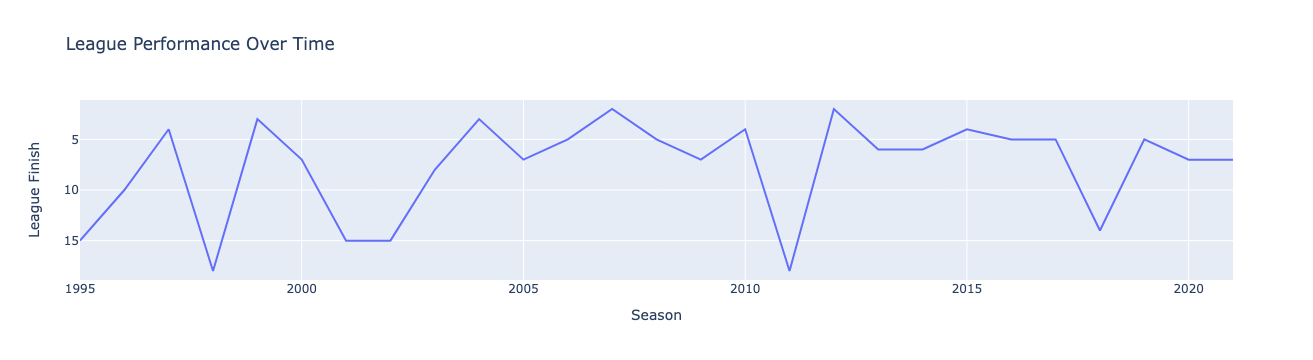

In [47]:
fig = px.line(master_df, x='season_start_year', y='league_finish', title= 'League Performance Over Time')
fig.update_layout(xaxis_title='Season', yaxis_title='League Finish')
fig.update_yaxes(autorange="reversed")
plt.show()
fig.show()

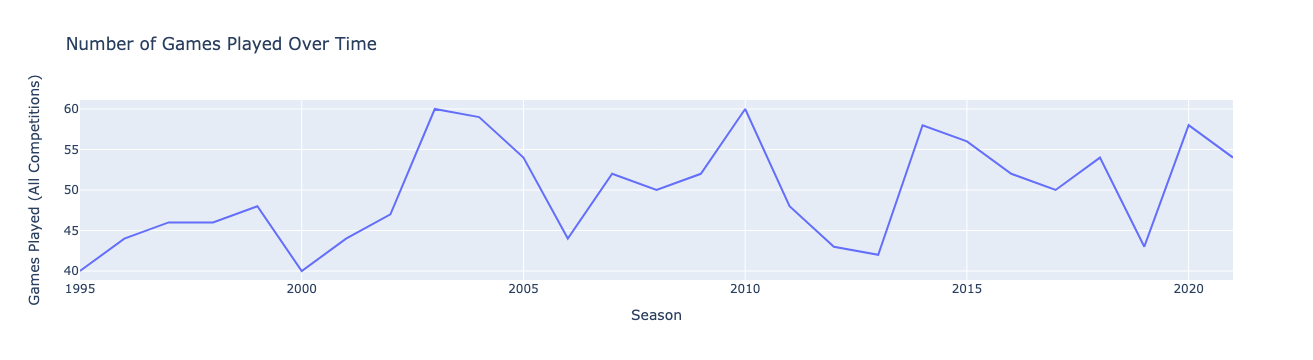

In [48]:
fig = px.line(master_df, x='season_start_year', y='games_played_(total)', title= 'Number of Games Played Over Time')
fig.update_layout(xaxis_title='Season', yaxis_title='Games Played (All Competitions)')
plt.show()
fig.show()

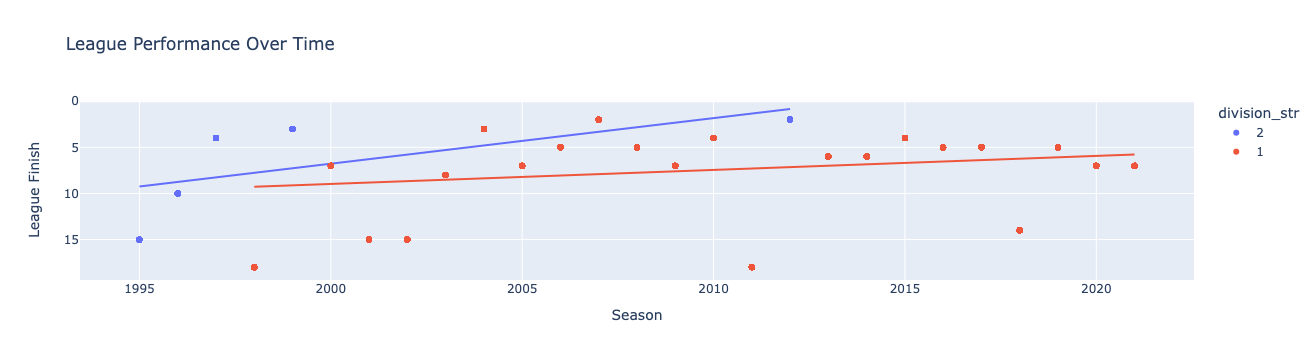

In [49]:
master_df2 = master_df.copy()
master_df2['division_str'] = master_df2['division'].apply(lambda x: str(x))
fig = px.scatter(master_df2, x='season_start_year', y='league_finish', trendline='ols', title= 'League Performance Over Time', color="division_str")
fig.update_layout(xaxis_title='Season', yaxis_title='League Finish')
fig.update_yaxes(autorange="reversed")
plt.show()
#fig.write_image("img/fig1.png", engine="orca")
fig.show()

#if division = 1, color = blue, if division = 2 

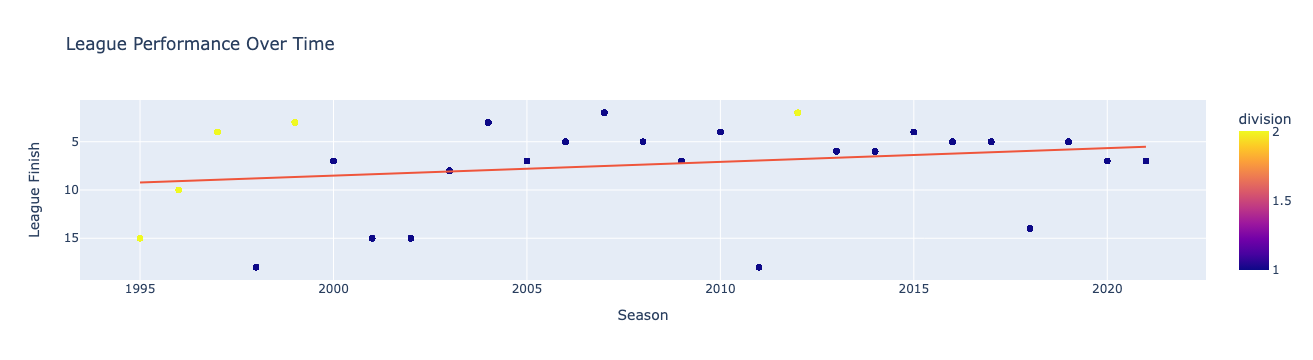

In [50]:
fig = px.scatter(master_df, x='season_start_year', y='league_finish', trendline='ols', title= 'League Performance Over Time', color="division")
fig.update_layout(xaxis_title='Season', yaxis_title='League Finish')
fig.update_yaxes(autorange="reversed")
plt.show()
#fig.write_image("img/fig1.png", engine="orca")
fig.show()

#if division = 1, color = blue, if division = 2 

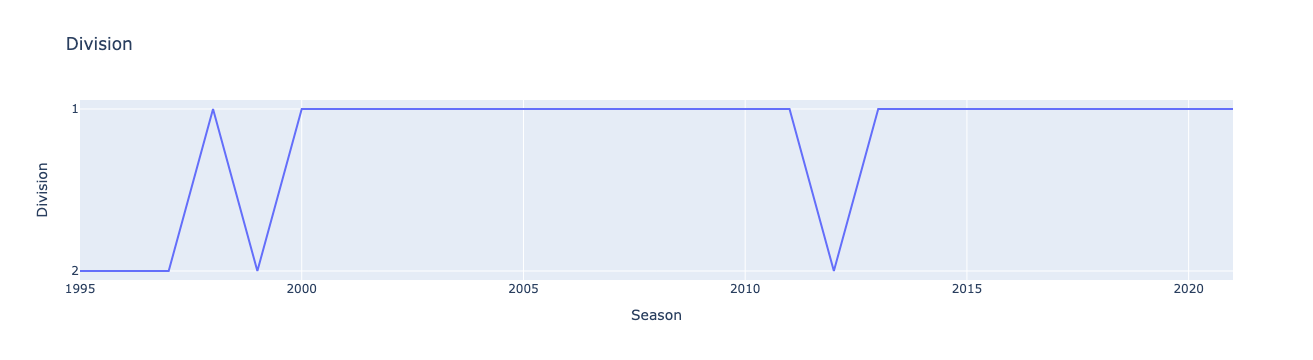

In [51]:
fig = px.line(master_df, x='season_start_year', y='division', title= 'Division')
fig.update_layout(xaxis_title='Season', yaxis_title='Division')
fig.update_layout(yaxis=dict(tickvals=[1, 2]))
fig.update_yaxes(autorange="reversed")
plt.show()
fig.show()

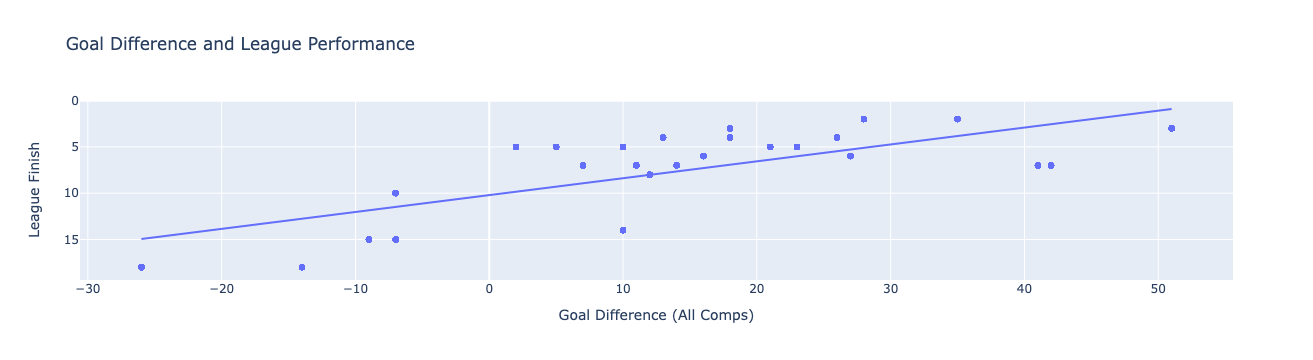

In [52]:
fig = px.scatter(master_df, x="goal_difference_(total)", y="league_finish", trendline='ols', title='Goal Difference and League Performance')
fig.update_layout(xaxis_title='Goal Difference (All Comps)', yaxis_title='League Finish')
fig.update_yaxes(autorange="reversed")
plt.show()
fig.show()

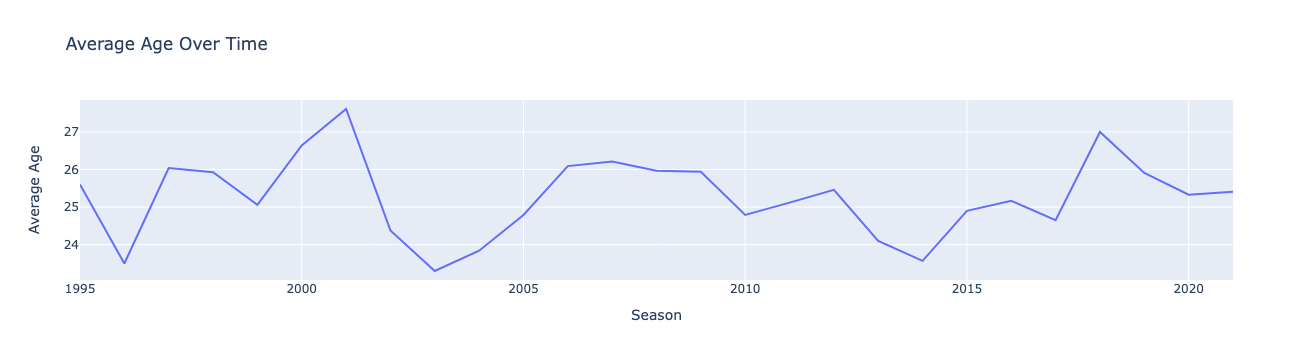

In [103]:
fig = px.line(master_df, x='season_start_year', y='average_age', title= 'Average Age Over Time')
fig.update_layout(xaxis_title='Season', yaxis_title='Average Age')
plt.show()
fig.show()

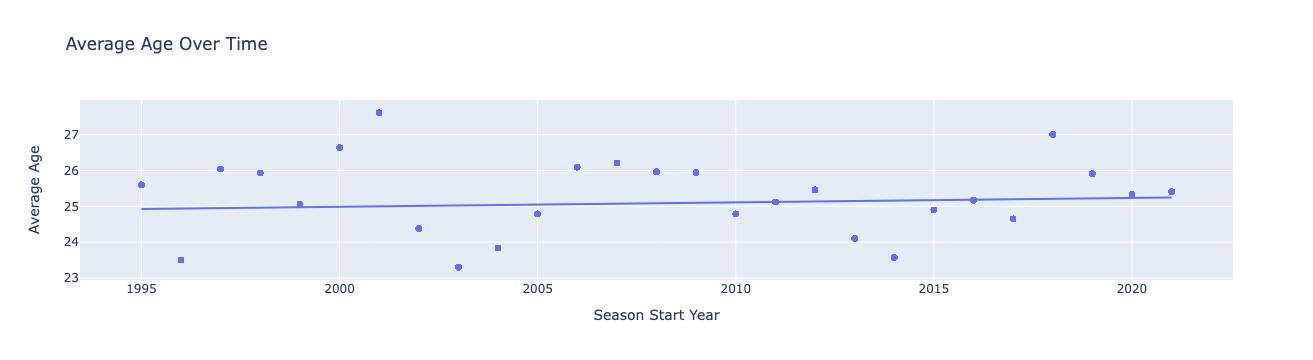

In [54]:
fig = px.scatter(master_df, x='season_start_year', y='average_age', trendline='ols', title= 'Average Age Over Time')
fig.update_layout(xaxis_title='Season Start Year', yaxis_title='Average Age')
plt.show()
fig.show()

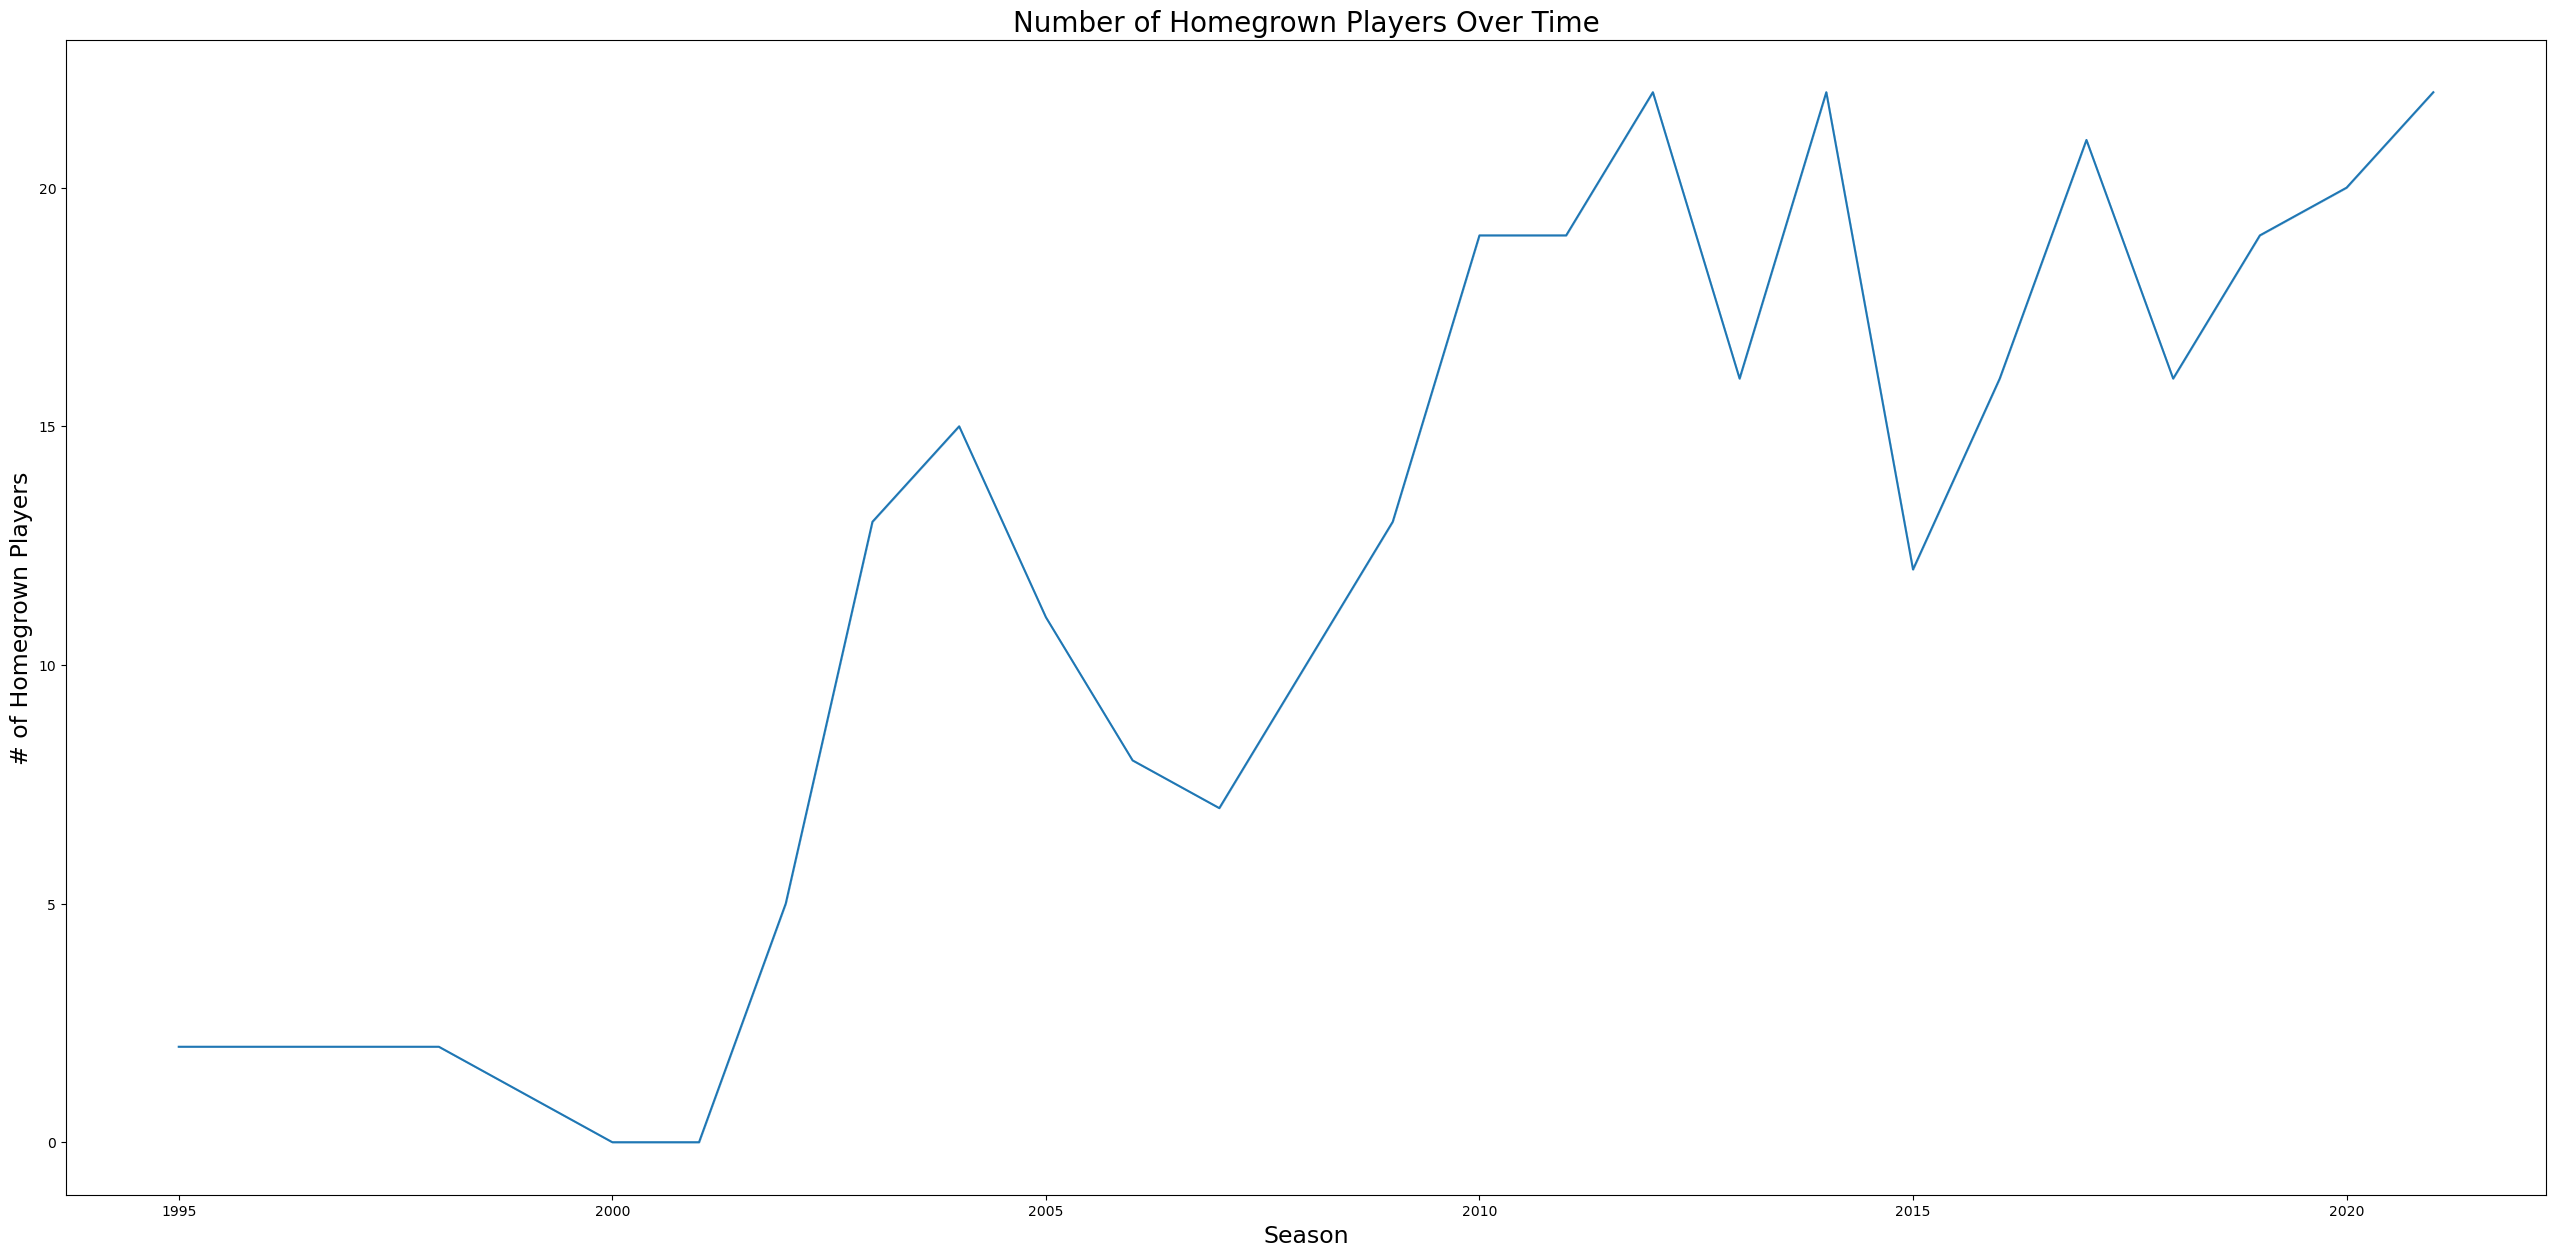

In [55]:
plt.figure(figsize=(32,15))
sns.lineplot(x='season_start_year', y='homegrown_players', data=master_df)
plt.xlabel('Season', fontsize=17)
plt.ylabel('# of Homegrown Players', fontsize=17)
plt.title('Number of Homegrown Players Over Time', fontsize=20)
plt.savefig("../img/sns_season_to_homegrown.png", dpi=300)
plt.show()
plt.show()

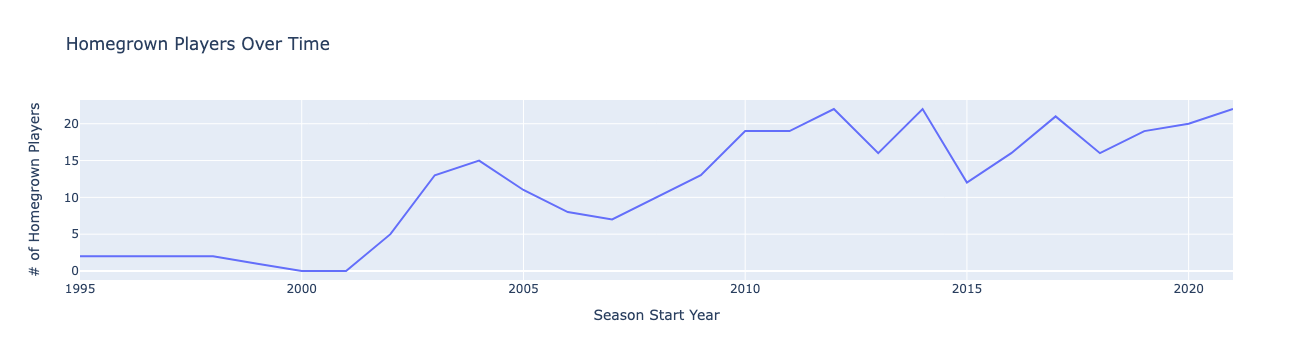

In [56]:
fig = px.line(master_df, x='season_start_year', y='homegrown_players', title= 'Homegrown Players Over Time')
fig.update_layout(xaxis_title='Season Start Year', yaxis_title='# of Homegrown Players')
plt.show()
fig.show()

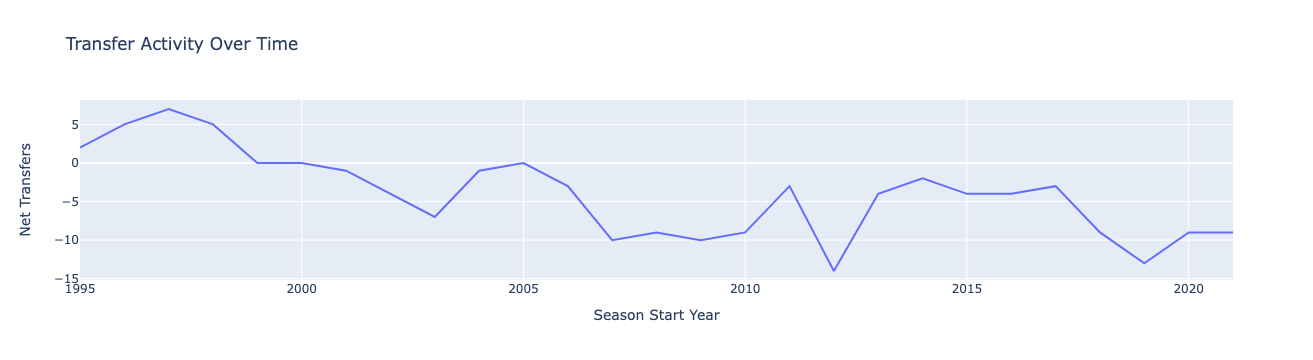

In [57]:
fig = px.line(master_df, x='season_start_year', y='net_transfers', title= 'Transfer Activity Over Time')
fig.update_layout(xaxis_title='Season Start Year', yaxis_title='Net Transfers')
plt.show()
fig.show()

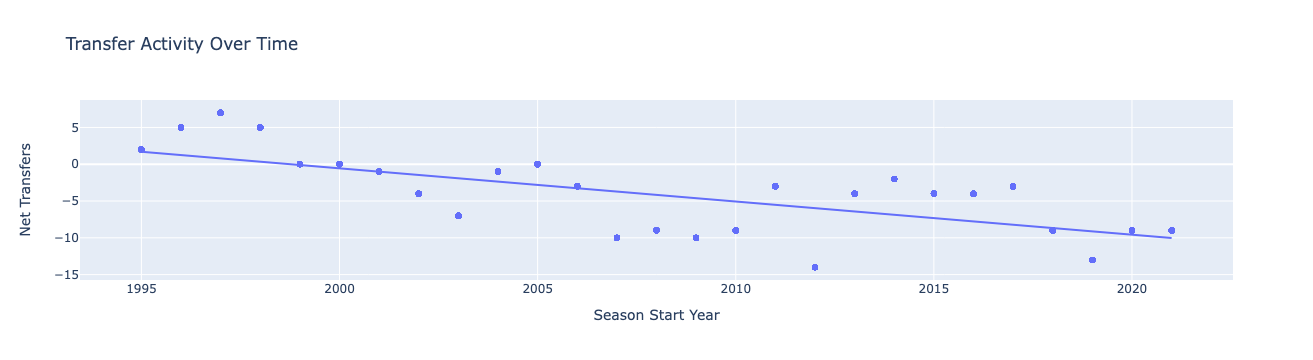

In [58]:
fig = px.scatter(master_df, x='season_start_year', y='net_transfers', trendline='ols',title= 'Transfer Activity Over Time')
fig.update_layout(xaxis_title='Season Start Year', yaxis_title='Net Transfers')
plt.show()
fig.show()

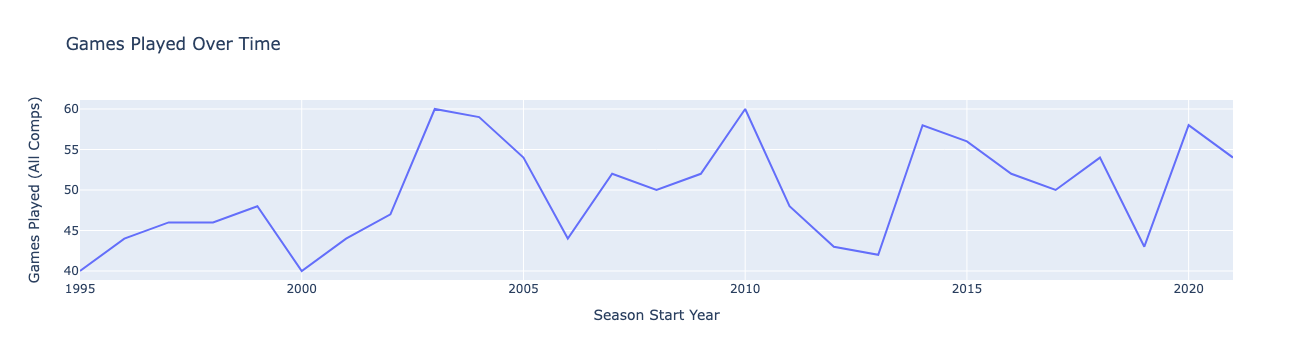

In [59]:
fig = px.line(master_df, x='season_start_year', y='games_played_(total)',title= 'Games Played Over Time')
fig.update_layout(xaxis_title='Season Start Year', yaxis_title='Games Played (All Comps)')
plt.show()
fig.show()

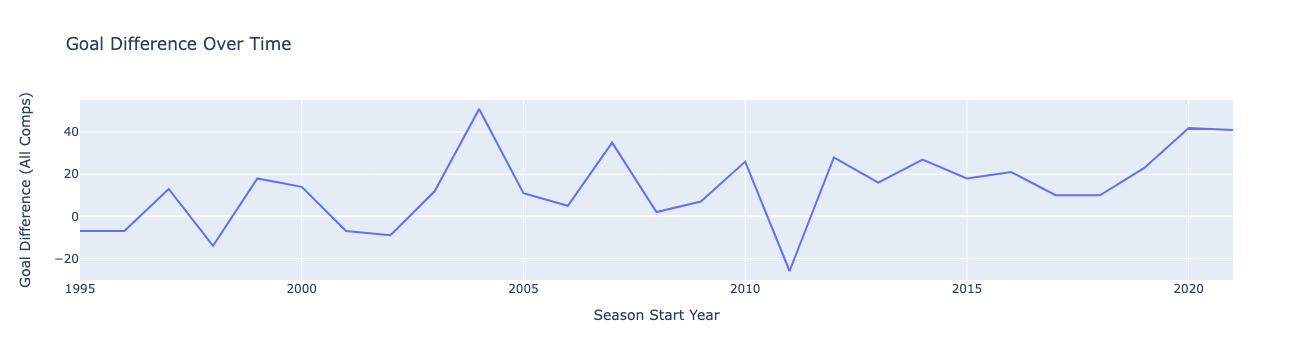

In [60]:
fig = px.line(master_df, x="season_start_year", y="goal_difference_(total)", title='Goal Difference Over Time')
fig.update_layout(xaxis_title='Season Start Year', yaxis_title='Goal Difference (All Comps)')
plt.show()
fig.show()

### Homegrown Players

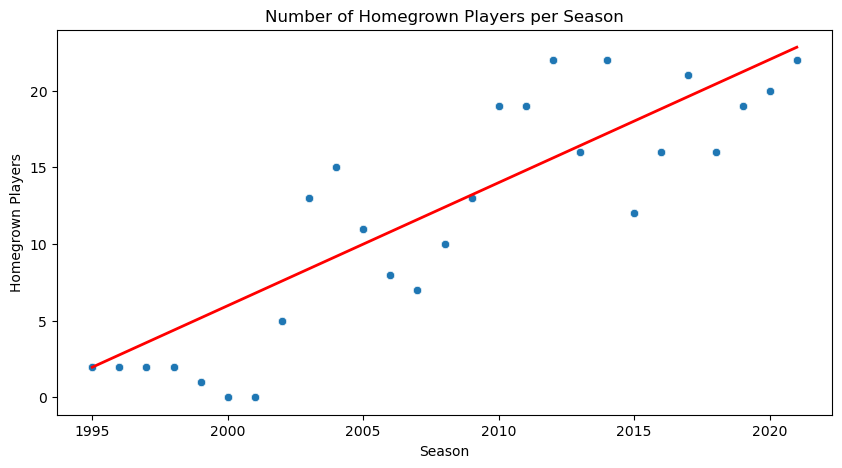

In [62]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data=master_df, y='homegrown_players', x='season_start_year')

x = master_df['season_start_year']
y = master_df['homegrown_players']

slope, intercept = np.polyfit(x, y, 1)

reg_x = np.array([min(x), max(x)])
reg_y = slope * reg_x + intercept

ax.plot(reg_x,reg_y,color='red', linestyle='-', linewidth=2)

ax.set_xlabel('Season')
ax.set_ylabel('Homegrown Players')
ax.set_title('Number of Homegrown Players per Season')
plt.savefig("../img/season_to_homegrown.png", dpi=300)
plt.show()

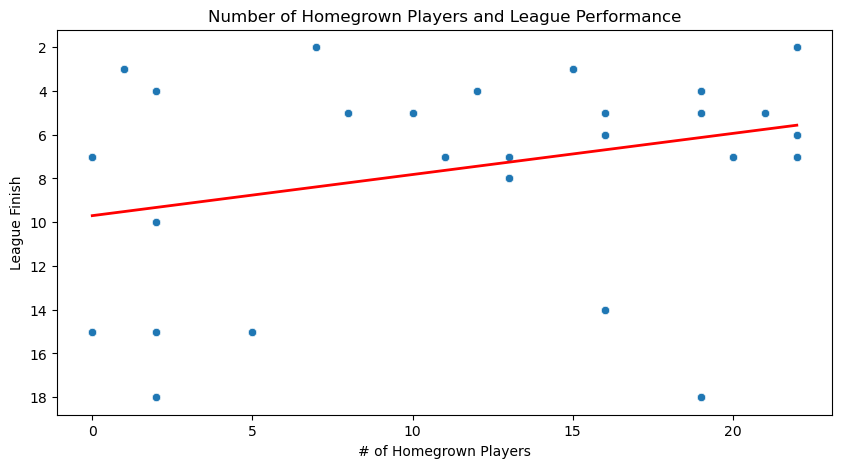

In [63]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data = master_df, y='league_finish', x='homegrown_players')

x = master_df['homegrown_players']
y = master_df['league_finish']

slope, intercept = np.polyfit(x, y, 1)

reg_x = np.array([min(x), max(x)])
reg_y = slope * reg_x + intercept

ax.plot(reg_x,reg_y,color='red', linestyle='-', linewidth=2)

ax.set_xlabel('# of Homegrown Players')
ax.set_ylabel('League Finish')
ax.set_title('Number of Homegrown Players and League Performance')
plt.gca().invert_yaxis()
plt.savefig("../img/league_finish_to_homegrown.png", dpi=300)
plt.show()

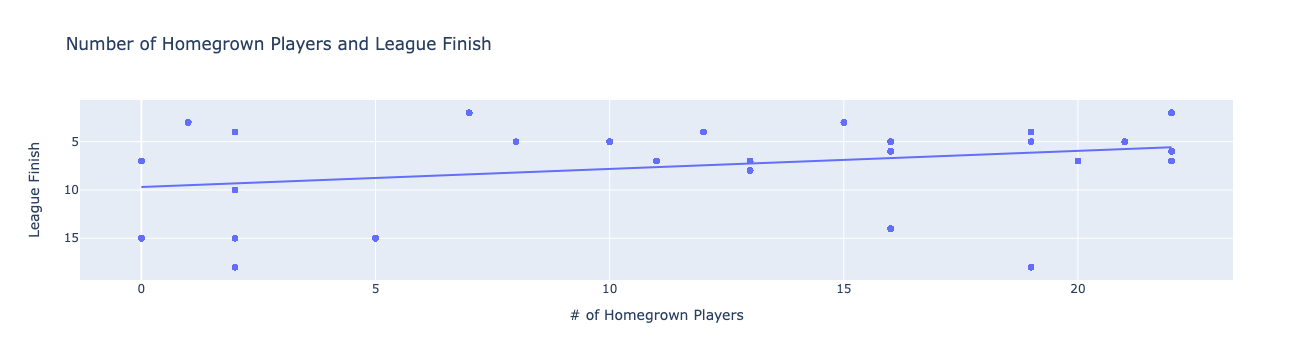

In [64]:
fig = px.scatter(master_df, x='homegrown_players', y='league_finish', trendline='ols', title= 'Number of Homegrown Players and League Finish')
fig.update_layout(xaxis_title='# of Homegrown Players', yaxis_title='League Finish')
fig.update_yaxes(autorange="reversed")
plt.show()
fig.show()

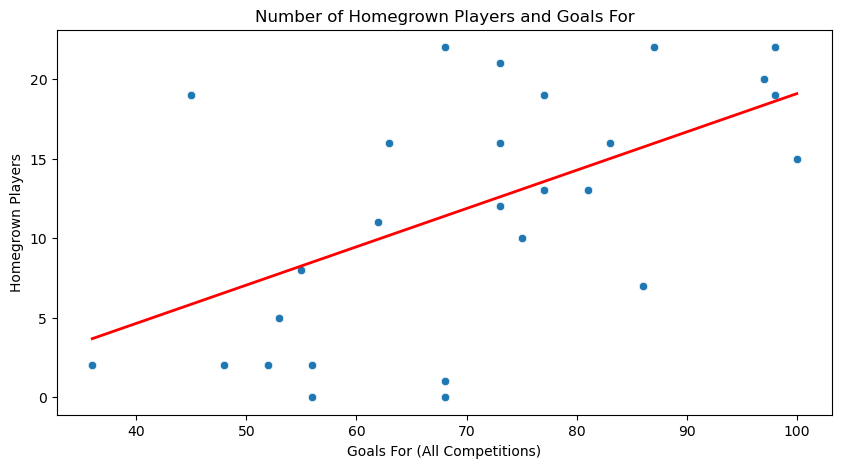

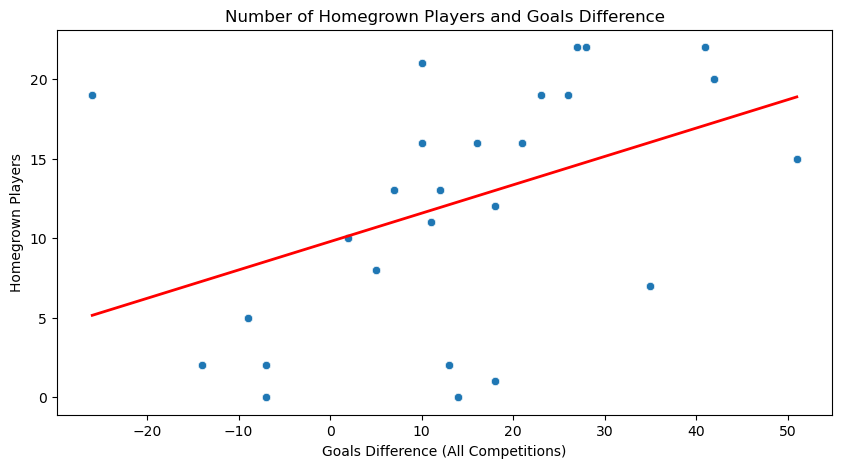

In [65]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data = master_df, y='homegrown_players', x='goals_for_(total)')

x = master_df['goals_for_(total)']
y = master_df['homegrown_players']

slope, intercept = np.polyfit(x, y, 1)

reg_x = np.array([min(x), max(x)])
reg_y = slope * reg_x + intercept

ax.plot(reg_x,reg_y,color='red', linestyle='-', linewidth=2)

ax.set_xlabel('Goals For (All Competitions)')
ax.set_ylabel('Homegrown Players')
ax.set_title('Number of Homegrown Players and Goals For')
plt.savefig("../img/goals_to_homegrown.png", dpi=300)
plt.show()

fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data = master_df, y='homegrown_players', x='goal_difference_(total)')

x = master_df['goal_difference_(total)']
y = master_df['homegrown_players']

slope, intercept = np.polyfit(x, y, 1)

reg_x = np.array([min(x), max(x)])
reg_y = slope * reg_x + intercept

ax.plot(reg_x,reg_y,color='red', linestyle='-', linewidth=2)

ax.set_xlabel('Goals Difference (All Competitions)')
ax.set_ylabel('Homegrown Players')
ax.set_title('Number of Homegrown Players and Goals Difference')
plt.savefig("../img/goal_difference_to_homegrown.png", dpi=300)
plt.show()

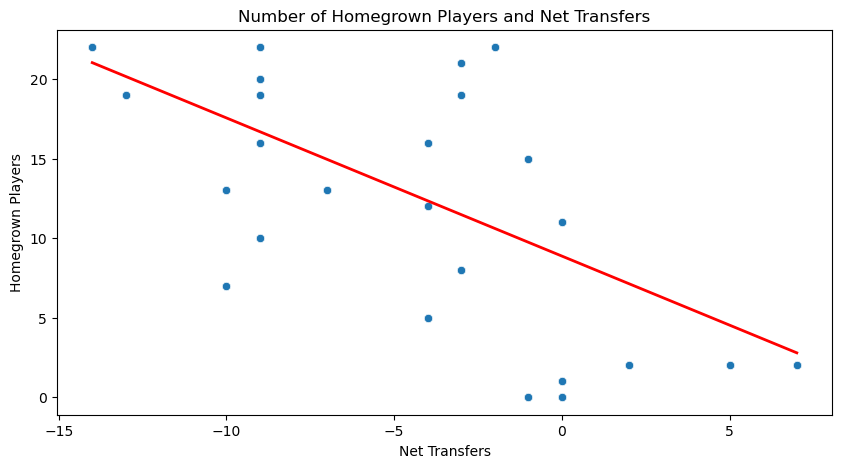

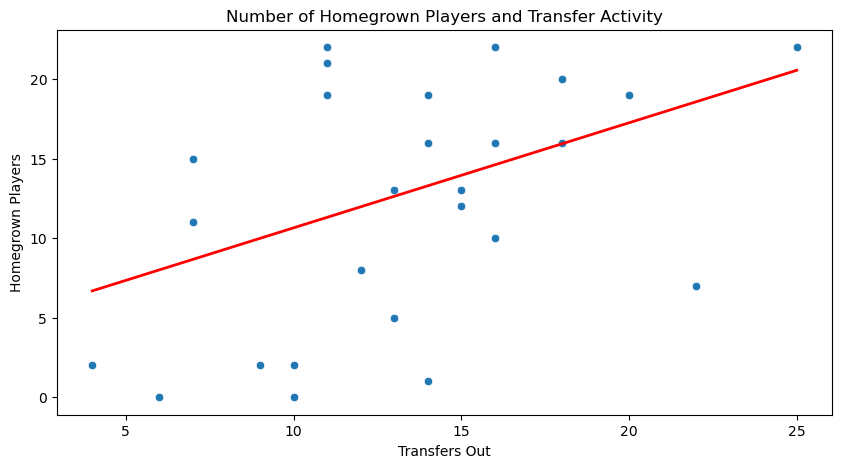

In [66]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data = master_df, y='homegrown_players', x='net_transfers')

x = master_df['net_transfers']
y = master_df['homegrown_players']

slope, intercept = np.polyfit(x, y, 1)

reg_x = np.array([min(x), max(x)])
reg_y = slope * reg_x + intercept

ax.plot(reg_x,reg_y,color='red', linestyle='-', linewidth=2)

ax.set_xlabel('Net Transfers')
ax.set_ylabel('Homegrown Players')
ax.set_title('Number of Homegrown Players and Net Transfers')
plt.savefig("../img/net_transfers_to_homegrown.png", dpi=300)
plt.show()

fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data = master_df, y='homegrown_players', x='transfers_out')

x = master_df['transfers_out']
y = master_df['homegrown_players']

slope, intercept = np.polyfit(x, y, 1)

reg_x = np.array([min(x), max(x)])
reg_y = slope * reg_x + intercept

ax.plot(reg_x,reg_y,color='red', linestyle='-', linewidth=2)

ax.set_xlabel('Transfers Out')
ax.set_ylabel('Homegrown Players')
ax.set_title('Number of Homegrown Players and Transfer Activity')
plt.savefig("../img/transfers_out_to_homegrown.png", dpi=300)
plt.show()

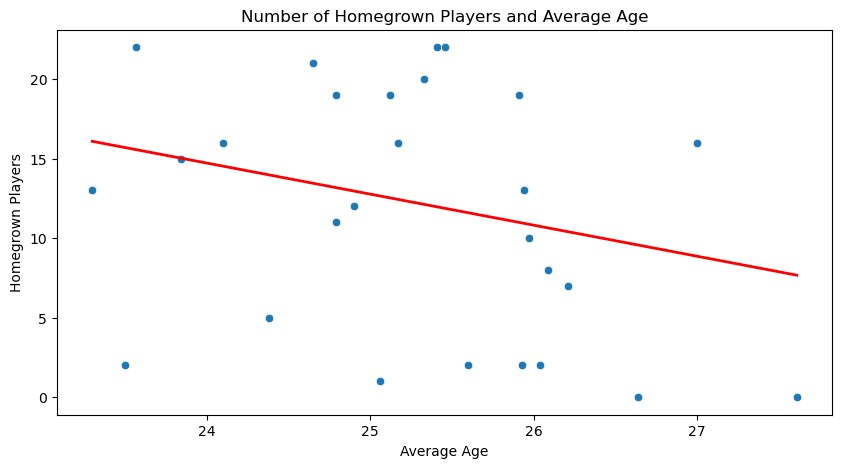

In [67]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data = master_df, y='homegrown_players', x='average_age')

x = master_df['average_age']
y = master_df['homegrown_players']

slope, intercept = np.polyfit(x, y, 1)

reg_x = np.array([min(x), max(x)])
reg_y = slope * reg_x + intercept

ax.plot(reg_x,reg_y,color='red', linestyle='-', linewidth=2)

ax.set_xlabel('Average Age')
ax.set_ylabel('Homegrown Players')
ax.set_title('Checking relationships')
ax.set_title('Number of Homegrown Players and Average Age')
plt.savefig("../img/age_to_homegrown.png", dpi=300)
plt.show()

### Average Age 

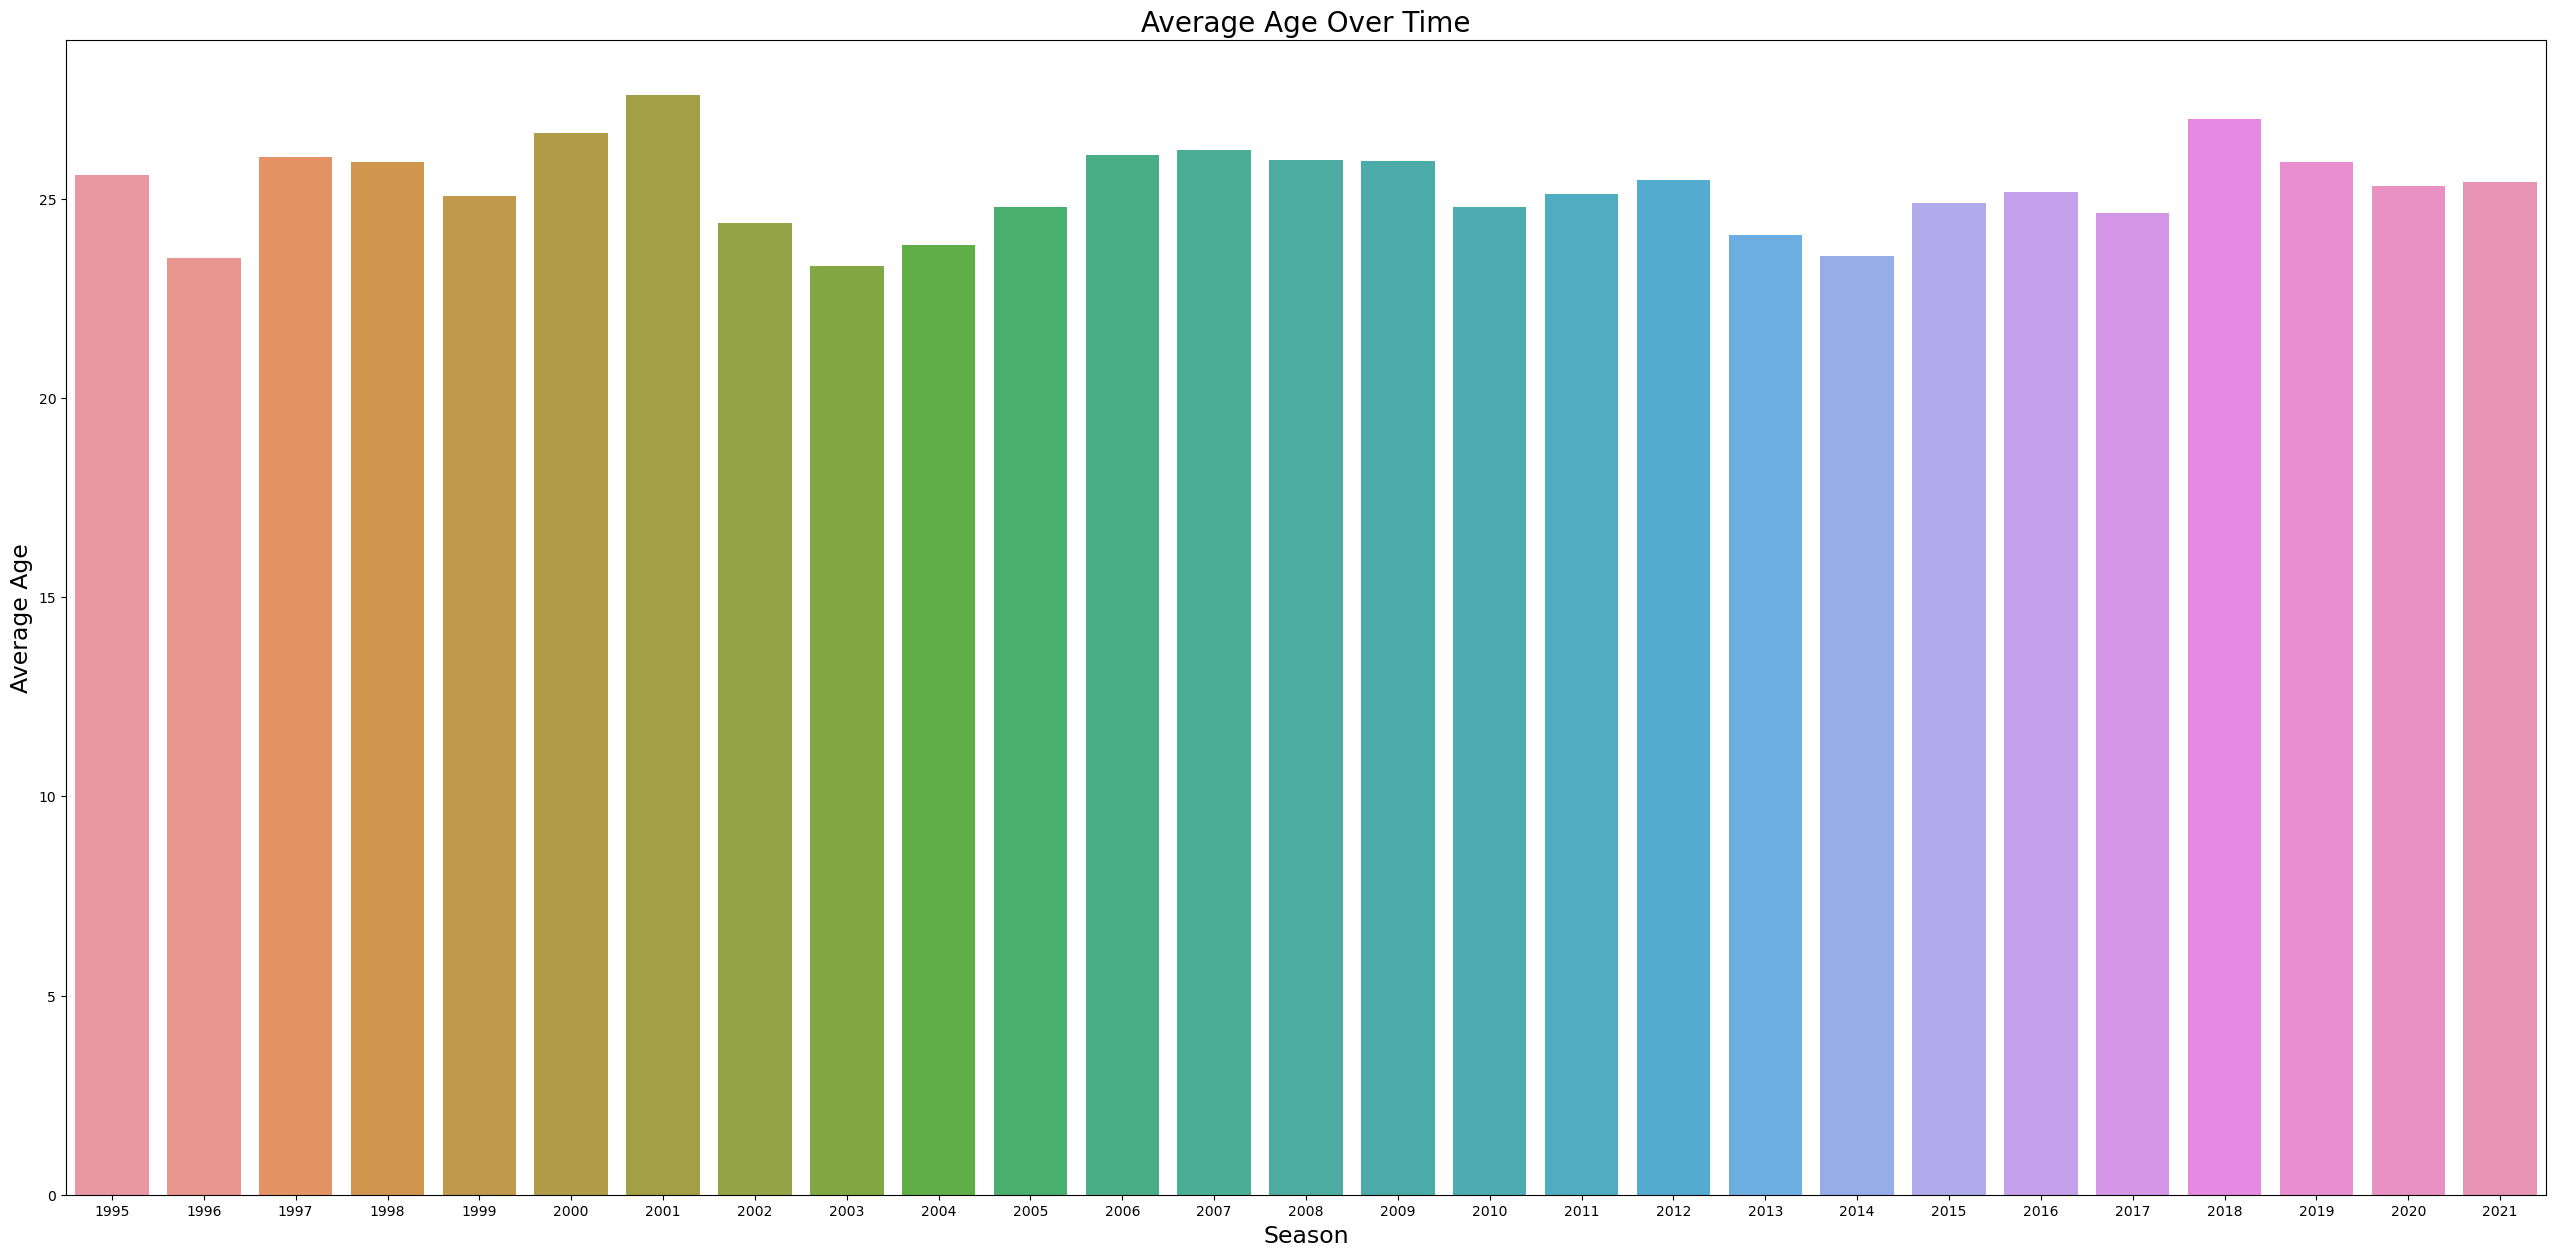

In [104]:
plt.figure(figsize=(32,15))
sns.barplot(x='season_start_year', y='average_age',data=master_df)
plt.xlabel('Season', fontsize=17)
plt.ylabel('Average Age', fontsize=17)
plt.title("Average Age Over Time", fontsize=20)
plt.savefig("../img/average_age.png", dpi=300)
plt.show()

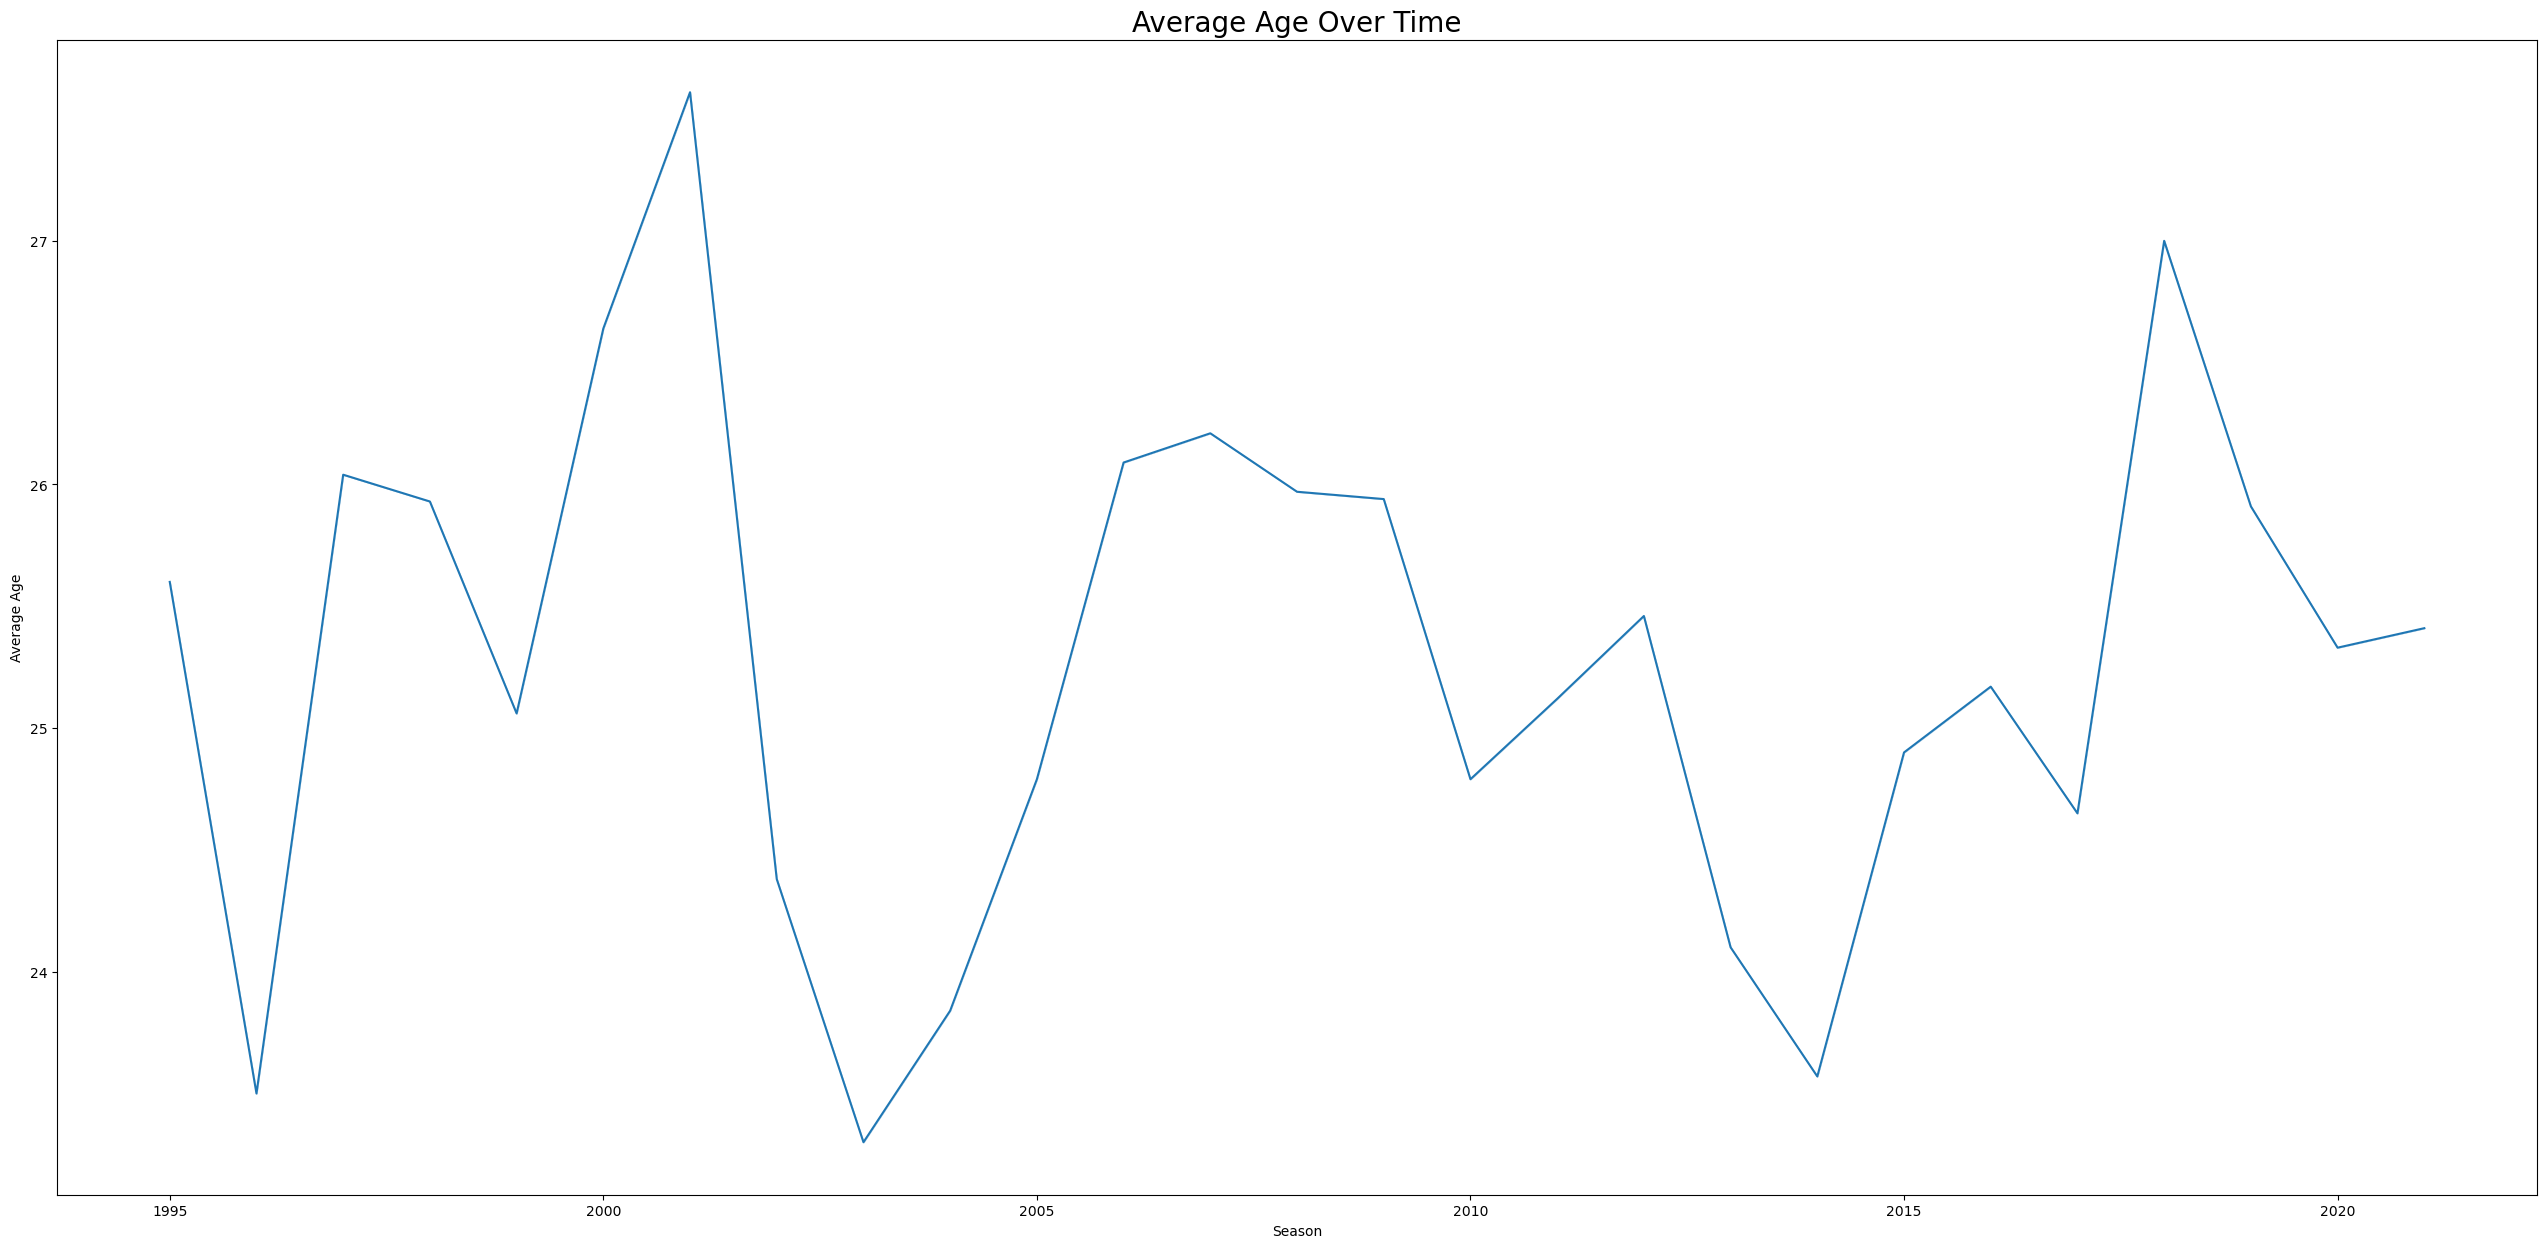

In [70]:
plt.figure(figsize=(32,15))
sns.lineplot(x='season_start_year', y='average_age', data=master_df)
plt.xlabel('Season')
plt.ylabel('Average Age')
plt.title("Average Age Over Time", fontsize=20)
plt.show()

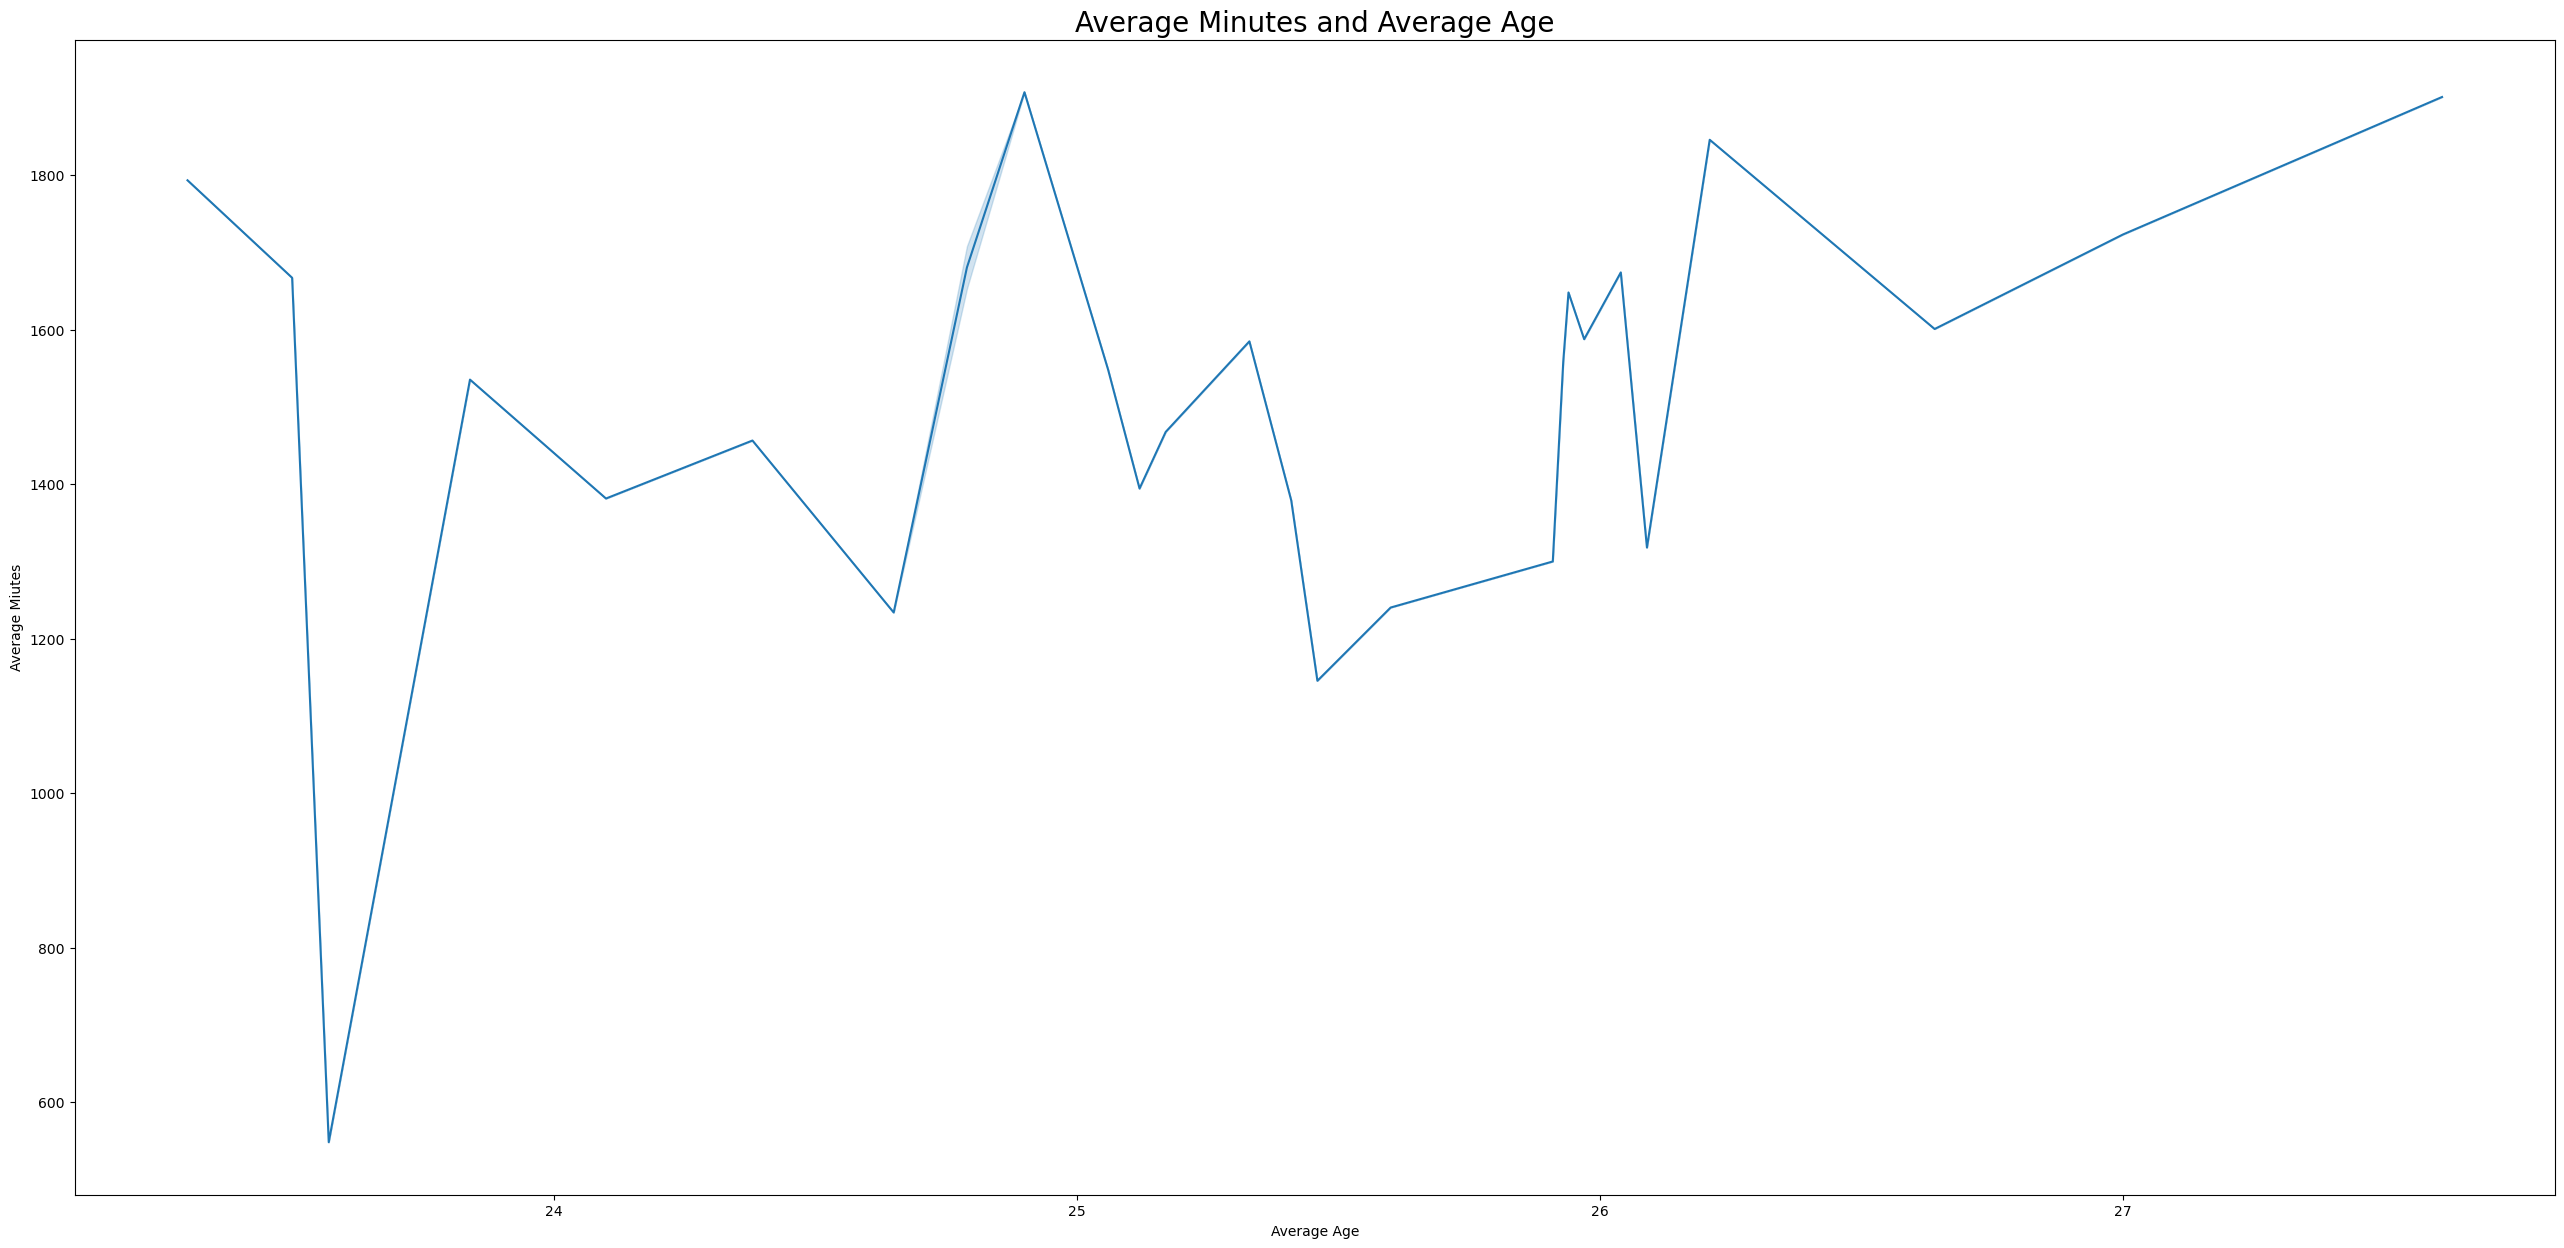

In [71]:
plt.figure(figsize=(32,15))
sns.lineplot(x='average_age', y='average_minutes', data=master_df)
plt.xlabel('Average Age')
plt.ylabel('Average Miutes')
plt.title("Average Minutes and Average Age", fontsize=20)
plt.show()

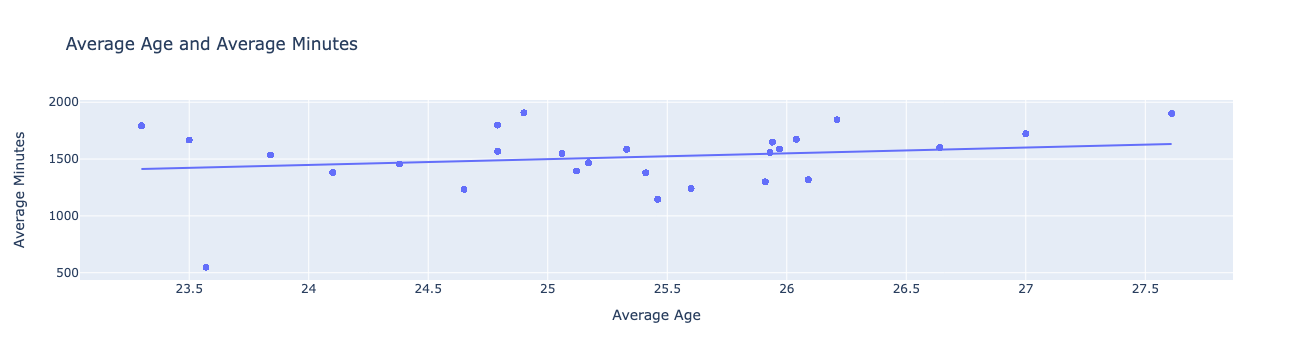

In [72]:
fig = px.scatter(master_df, x='average_age', y='average_minutes', trendline='ols', title= 'Average Age and Average Minutes')
fig.update_layout(xaxis_title='Average Age', yaxis_title='Average Minutes')
plt.show()
fig.show()

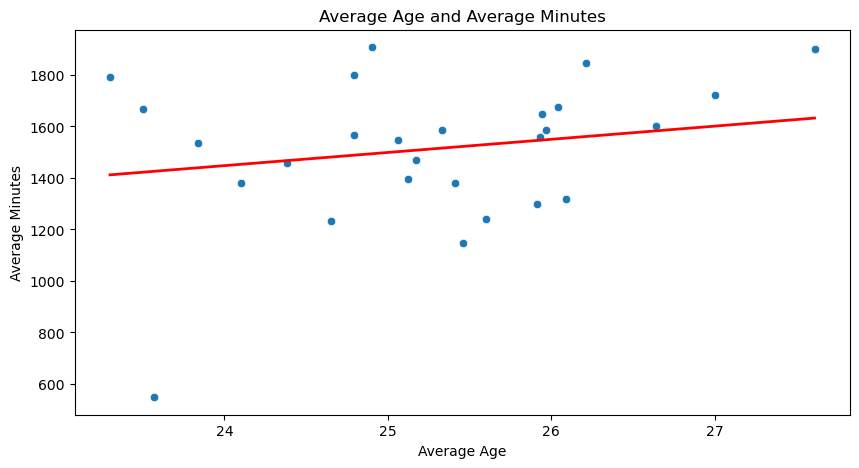

In [73]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data = master_df, x='average_age', y='average_minutes')

x = master_df['average_age']
y = master_df['average_minutes']

slope, intercept = np.polyfit(x, y, 1)

reg_x = np.array([min(x), max(x)])
reg_y = slope * reg_x + intercept

ax.plot(reg_x,reg_y,color='red', linestyle='-', linewidth=2)

ax.set_xlabel('Average Age')
ax.set_ylabel('Average Minutes')
ax.set_title('Average Age and Average Minutes')
plt.show()

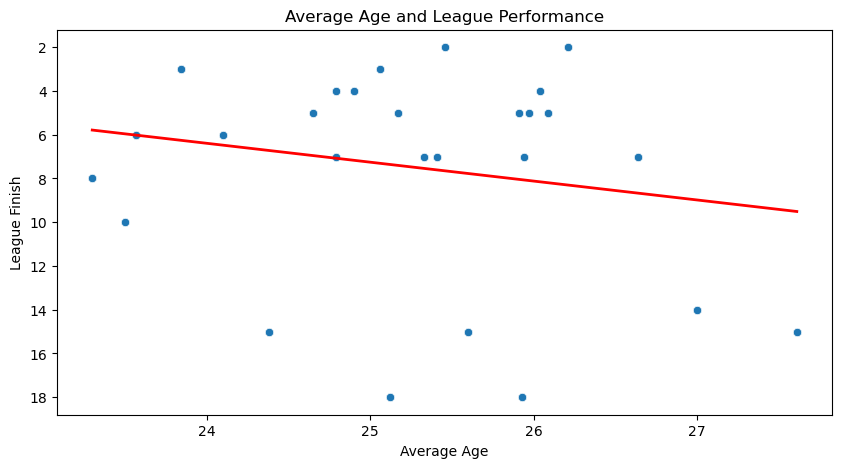

In [74]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data = master_df, x='average_age', y='league_finish')

x = master_df['average_age']
y = master_df['league_finish']

slope, intercept = np.polyfit(x, y, 1)

reg_x = np.array([min(x), max(x)])
reg_y = slope * reg_x + intercept

ax.plot(reg_x,reg_y,color='red', linestyle='-', linewidth=2)

ax.set_xlabel('Average Age')
ax.set_ylabel('League Finish')
ax.set_title('Average Age and League Performance')
plt.gca().invert_yaxis()
plt.show()

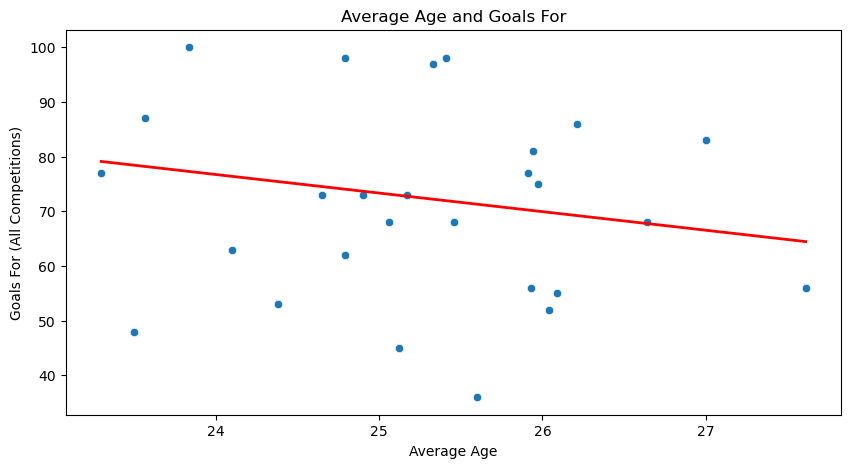

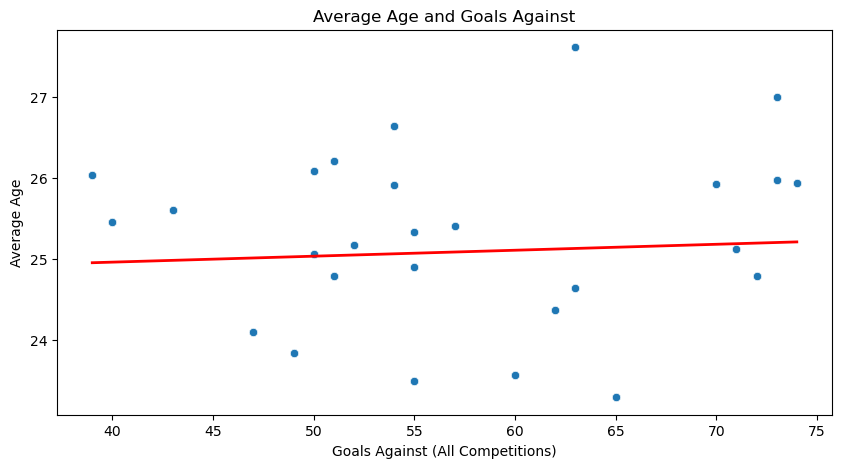

In [75]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data = master_df, x='average_age', y='goals_for_(total)')

x = master_df['average_age']
y = master_df['goals_for_(total)']

slope, intercept = np.polyfit(x, y, 1)

reg_x = np.array([min(x), max(x)])
reg_y = slope * reg_x + intercept

ax.plot(reg_x,reg_y,color='red', linestyle='-', linewidth=2)

ax.set_xlabel('Average Age')
ax.set_ylabel('Goals For (All Competitions)')
ax.set_title('Average Age and Goals For')
plt.show()

fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data = master_df, y='average_age', x='goals_against_(total)')

x = master_df['goals_against_(total)']
y = master_df['average_age']

slope, intercept = np.polyfit(x, y, 1)

reg_x = np.array([min(x), max(x)])
reg_y = slope * reg_x + intercept

ax.plot(reg_x,reg_y,color='red', linestyle='-', linewidth=2)

ax.set_xlabel('Goals Against (All Competitions)')
ax.set_ylabel('Average Age')
ax.set_title('Average Age and Goals Against')
plt.show()

### Goal Difference

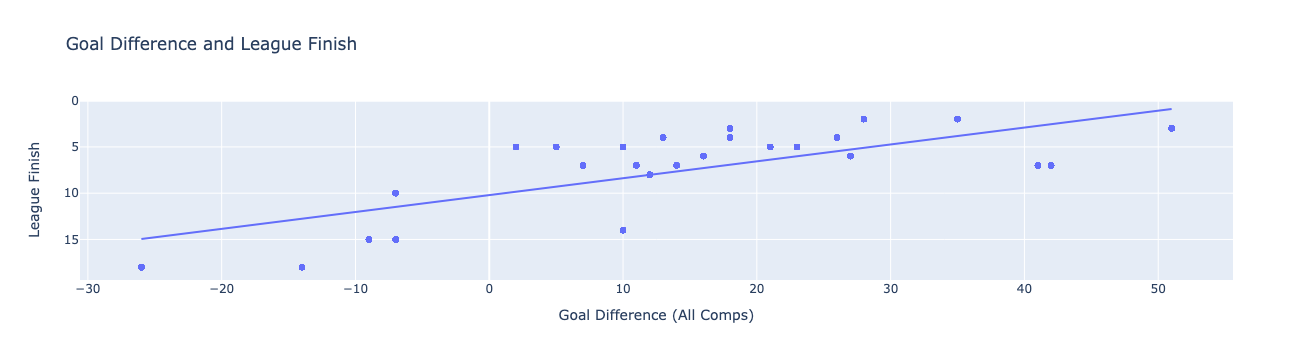

In [76]:
fig = px.scatter(master_df, x="goal_difference_(total)", y="league_finish", trendline='ols', title='Goal Difference and League Finish')
fig.update_layout(xaxis_title='Goal Difference (All Comps)', yaxis_title='League Finish')
fig.update_yaxes(autorange="reversed")
plt.show()
fig.show()

### Transfer Activity

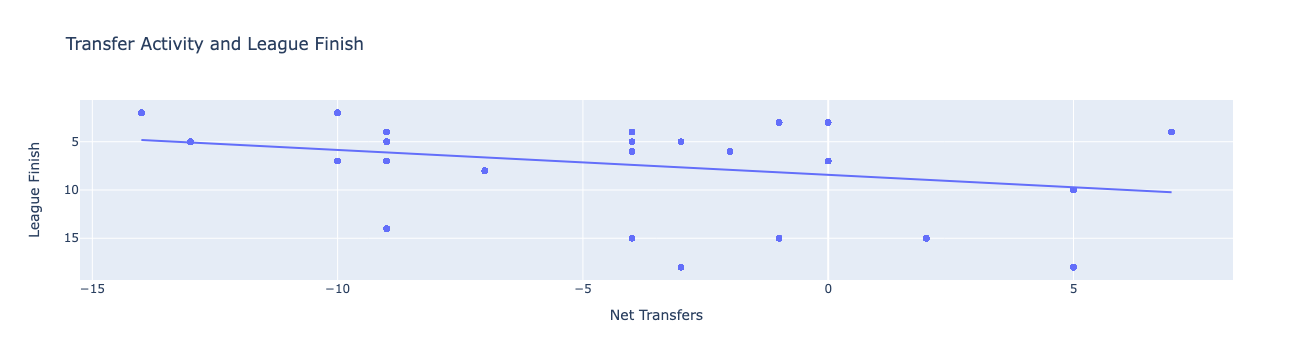

In [77]:
fig = px.scatter(master_df, x="net_transfers", y="league_finish", trendline='ols', title='Transfer Activity and League Finish')
fig.update_layout(xaxis_title='Net Transfers', yaxis_title='League Finish')
fig.update_yaxes(autorange="reversed")
plt.show()
fig.show()

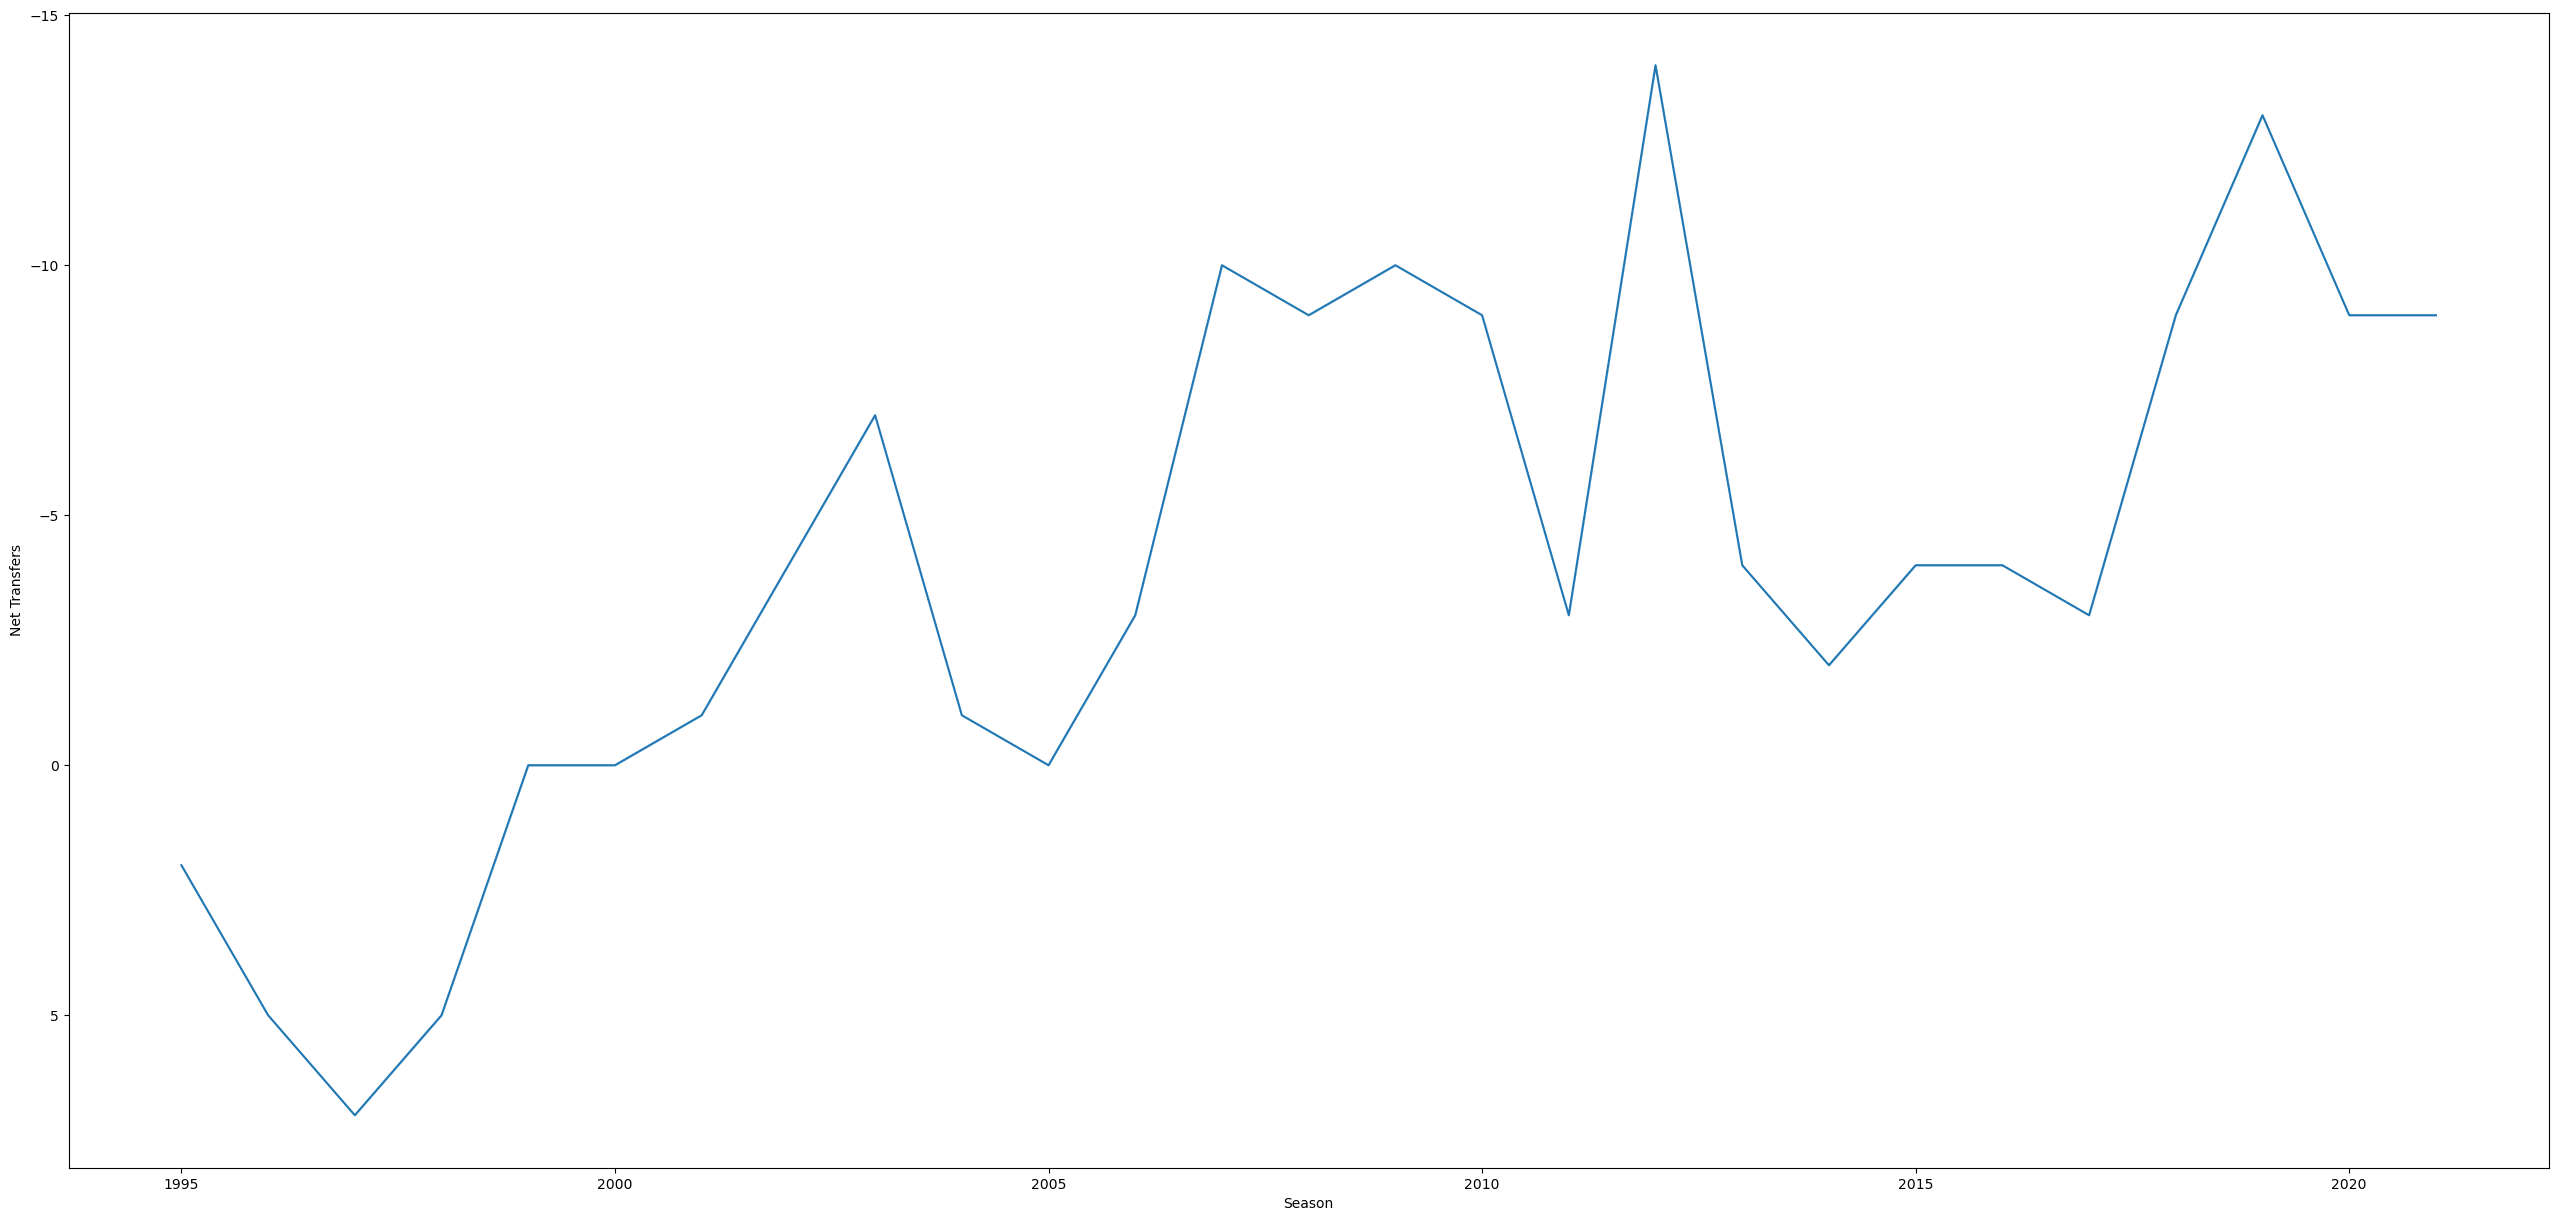

In [78]:
plt.figure(figsize=(32,15))
sns.lineplot(x='season_start_year', y='net_transfers', data=master_df)
plt.xlabel('Season')
plt.ylabel('Net Transfers')
plt.gca().invert_yaxis()
ax.set_title('Net Transfers Over Time')
plt.savefig("../img/transfers_over_time.png", dpi=300)
plt.show()

In [79]:
sns.reset_defaults()

### Seasons (Again)

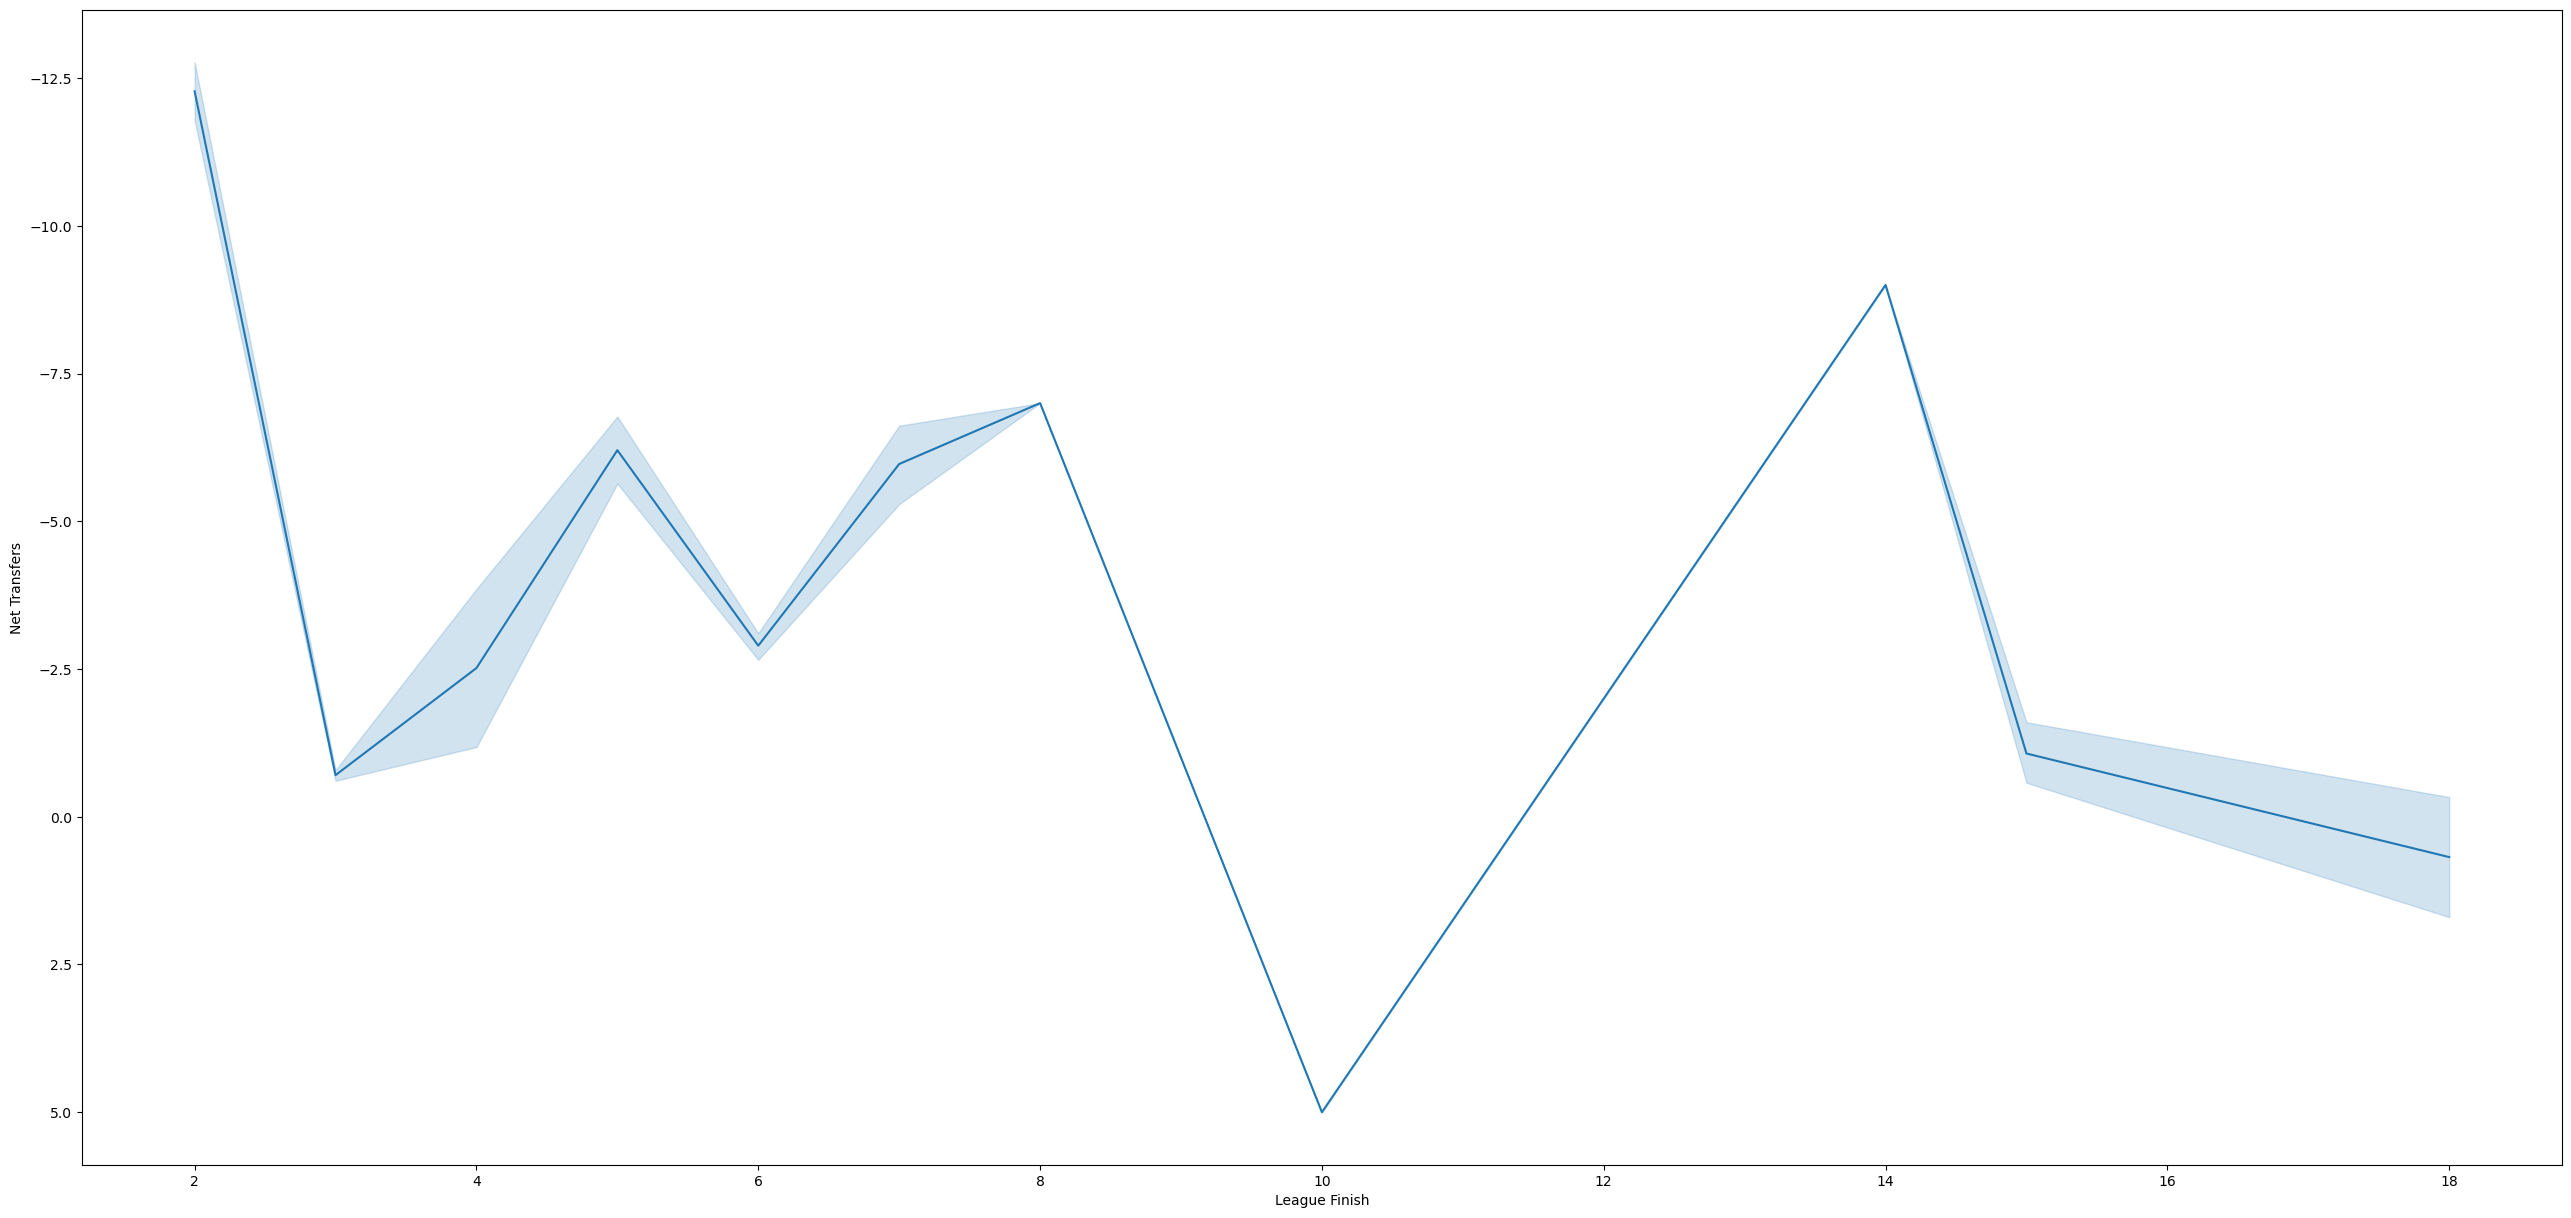

In [80]:
plt.figure(figsize=(32,15))
sns.lineplot(x='league_finish', y='net_transfers', data=master_df)
plt.xlabel('League Finish')
plt.ylabel('Net Transfers')
plt.gca().invert_yaxis()
ax.set_title('Net Transfers and League Performance')
plt.savefig("../img/season_to_homegrown.png", dpi=300)
plt.show()
plt.show()

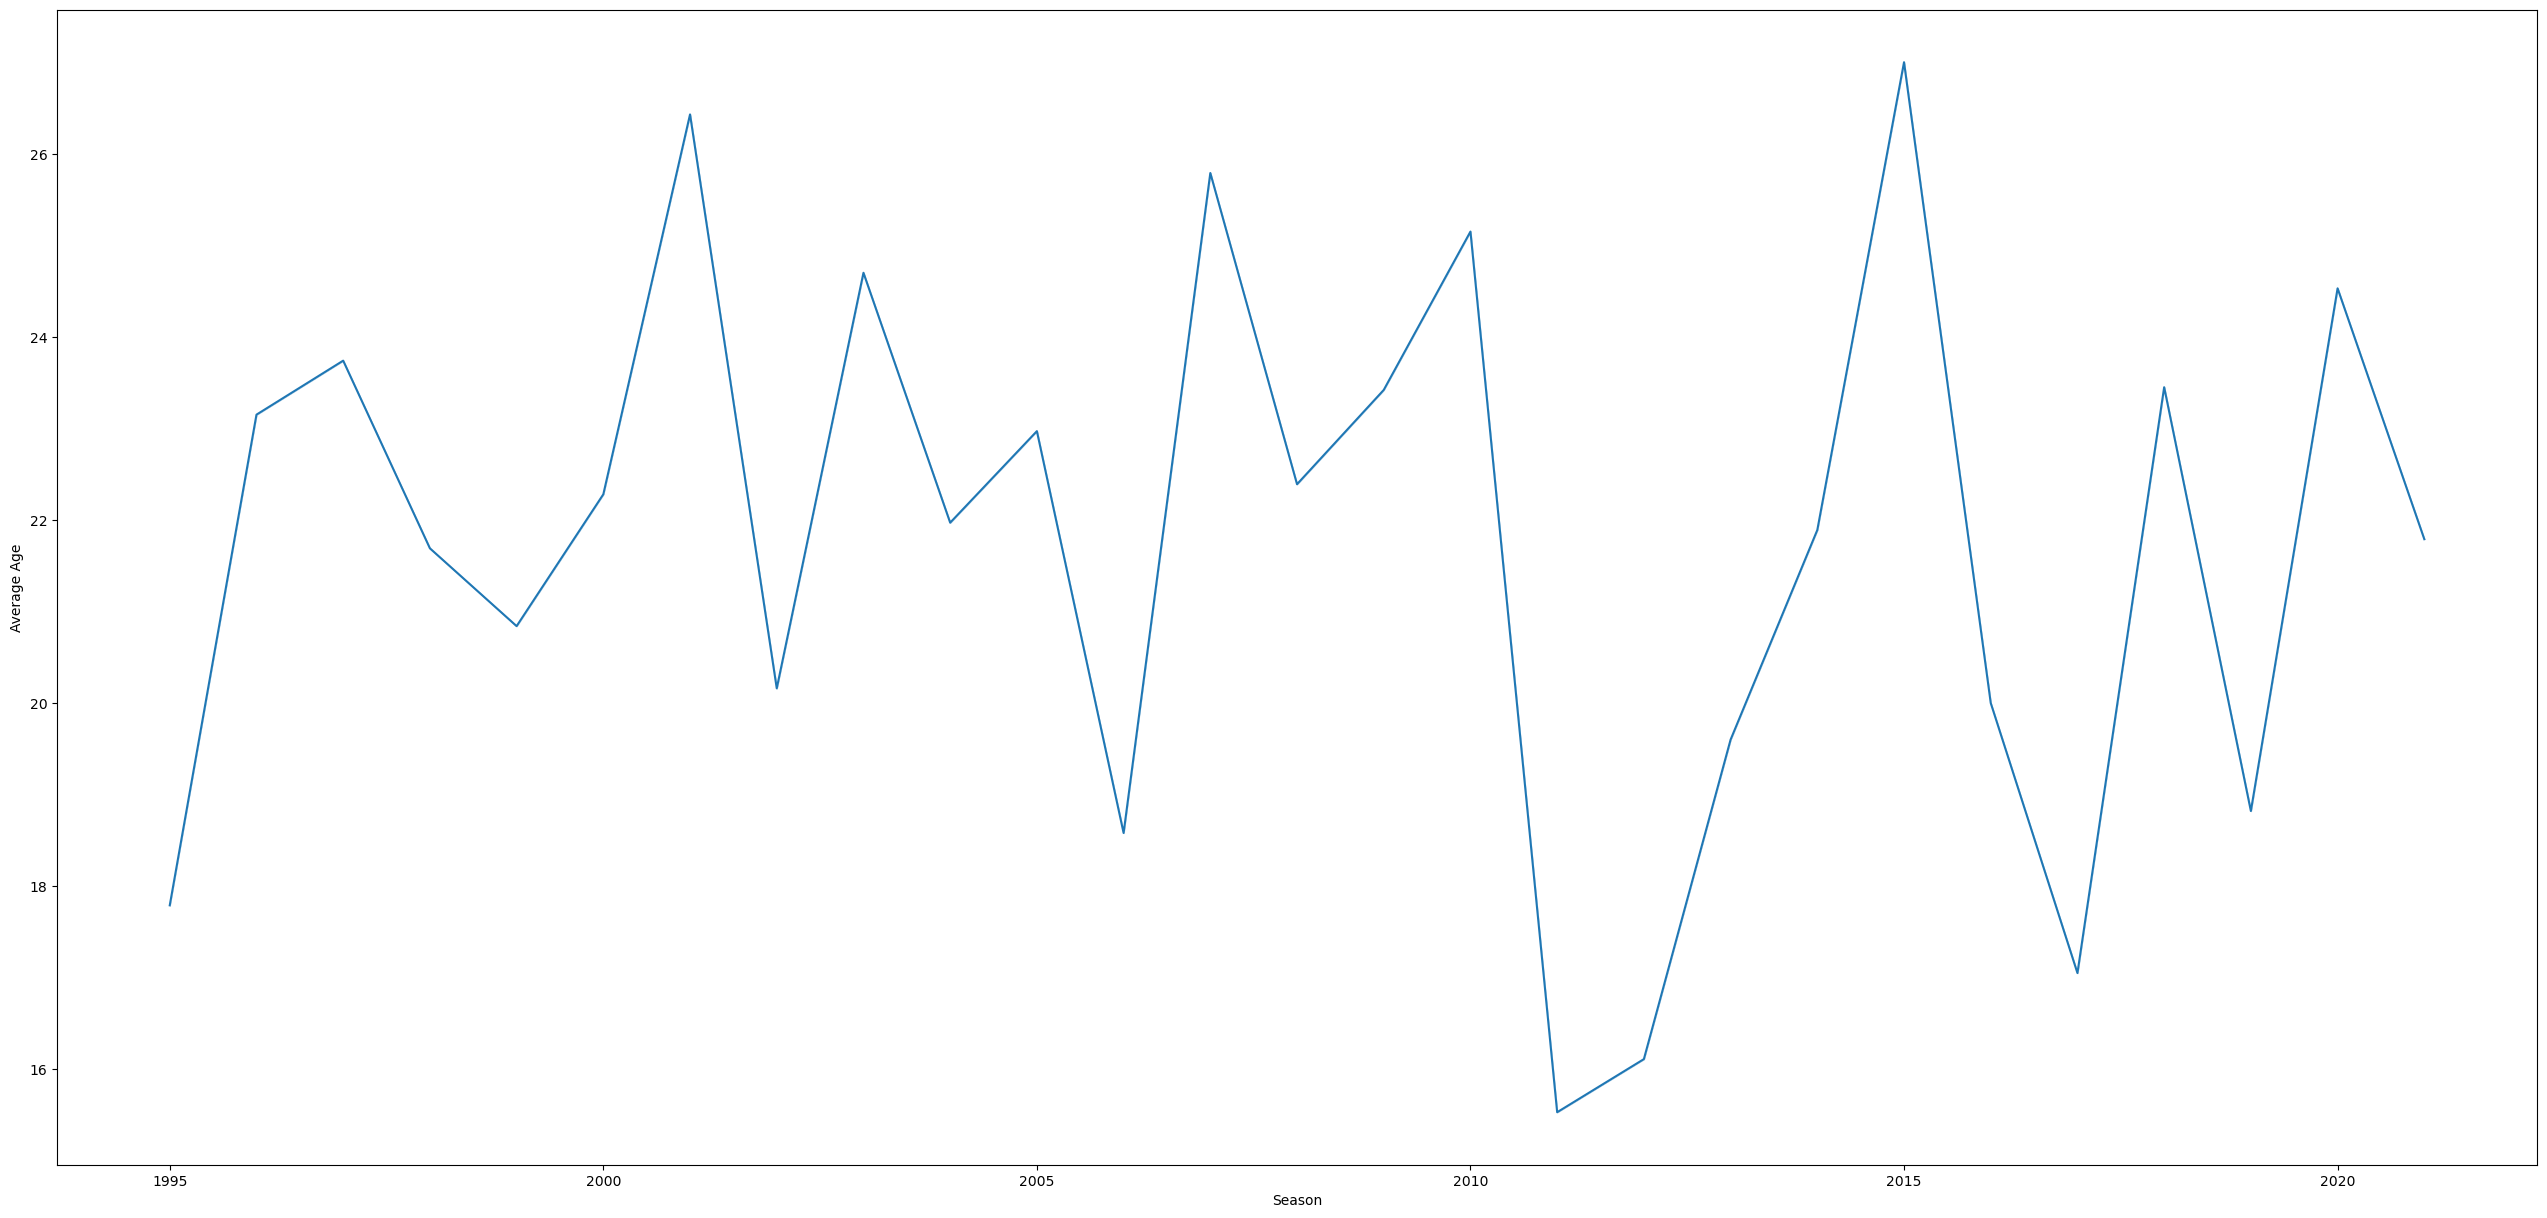

In [81]:
plt.figure(figsize=(32,15))
sns.lineplot(x='season_start_year', y='average_appearances', data=master_df)
plt.xlabel('Season')
plt.ylabel('Average Age')
plt.show()

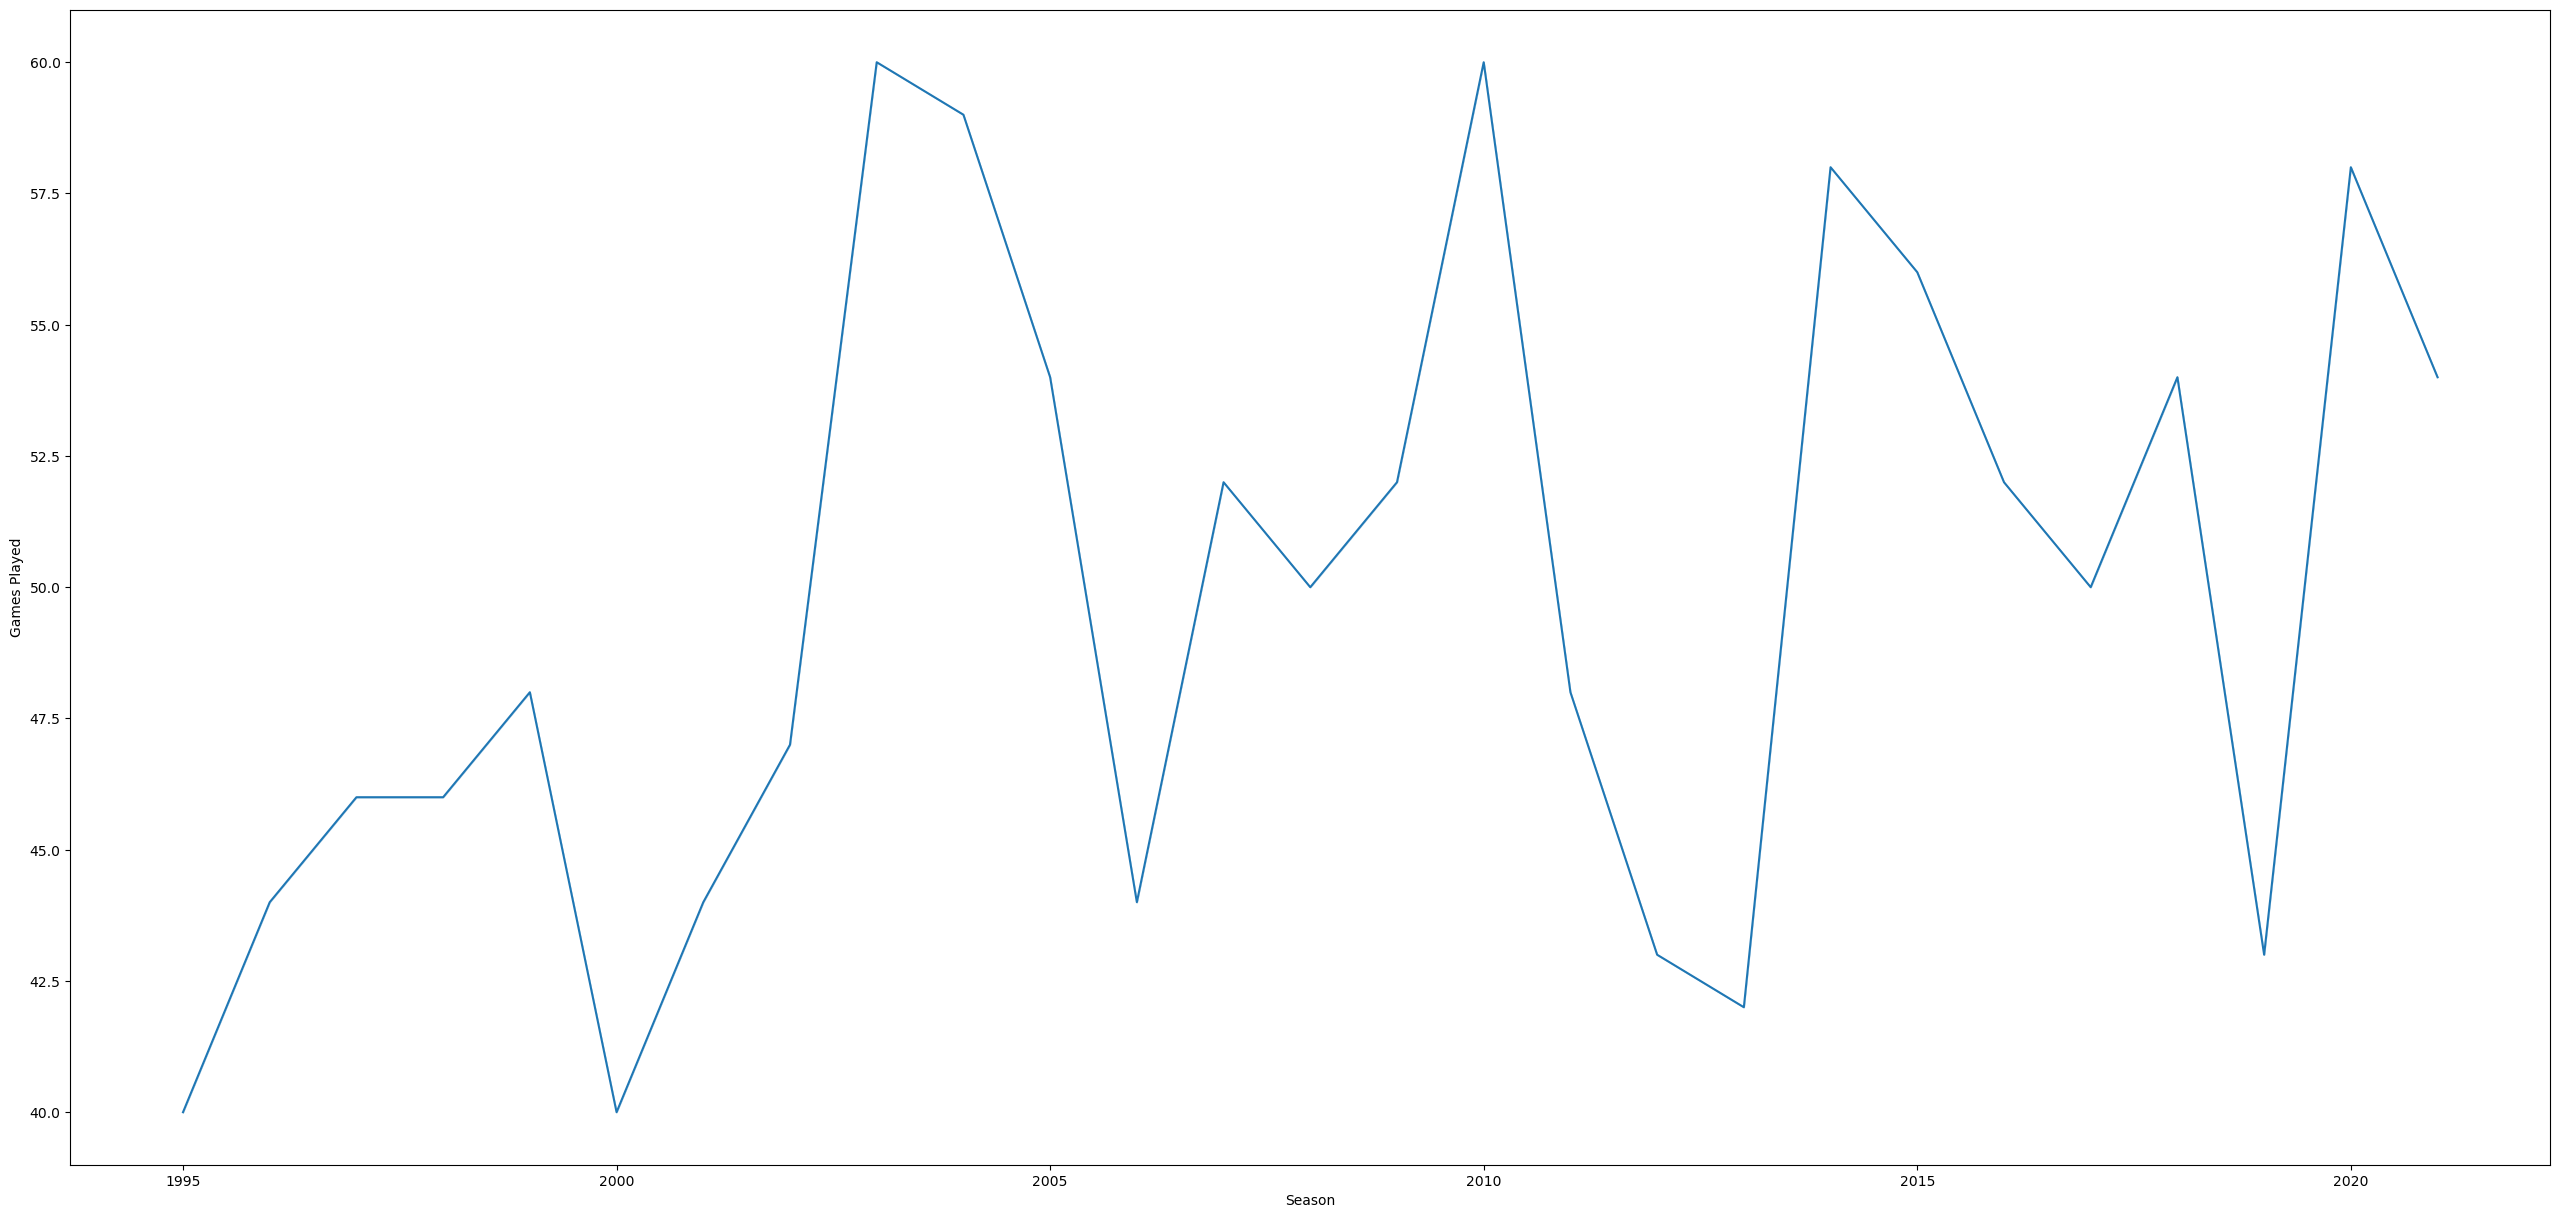

In [82]:
plt.figure(figsize=(32,15))
sns.lineplot(x='season_start_year', y='games_played_(total)', data=master_df)
plt.xlabel('Season')
plt.ylabel('Games Played')
ax.set_title('Games Played Per Season Over Time')
plt.savefig("../img/games_played_season.png", dpi=300)
plt.show()

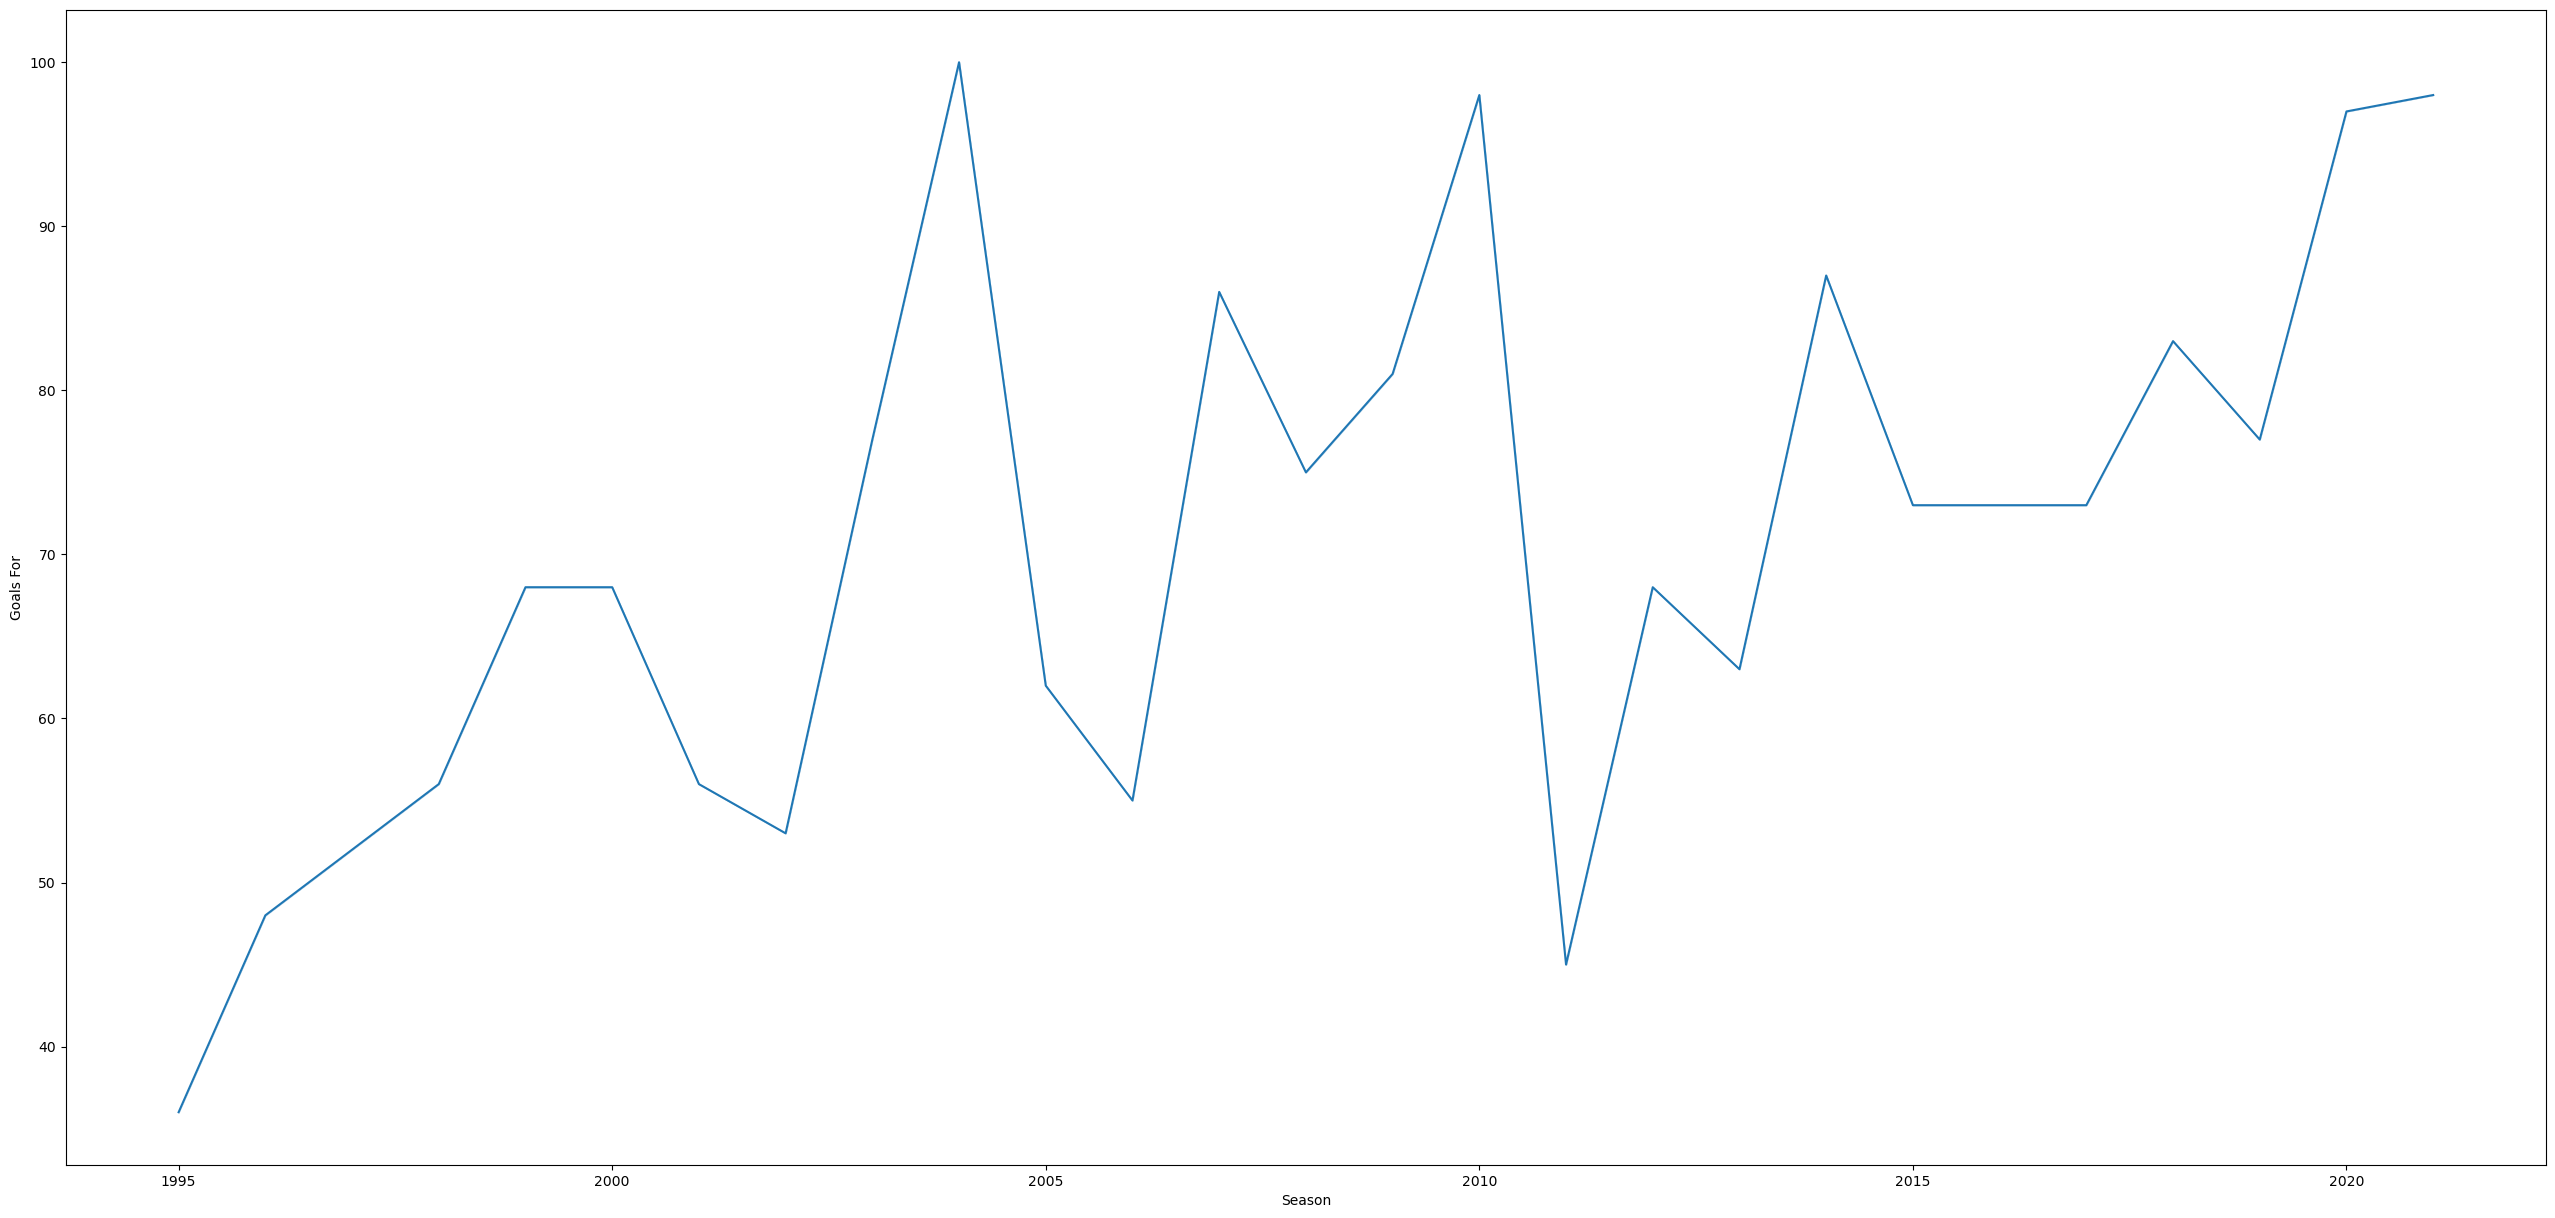

In [83]:
plt.figure(figsize=(32,15))
sns.lineplot(x='season_start_year', y='goals_for_(total)', data=master_df)
plt.xlabel('Season')
plt.ylabel('Goals For')
plt.show()

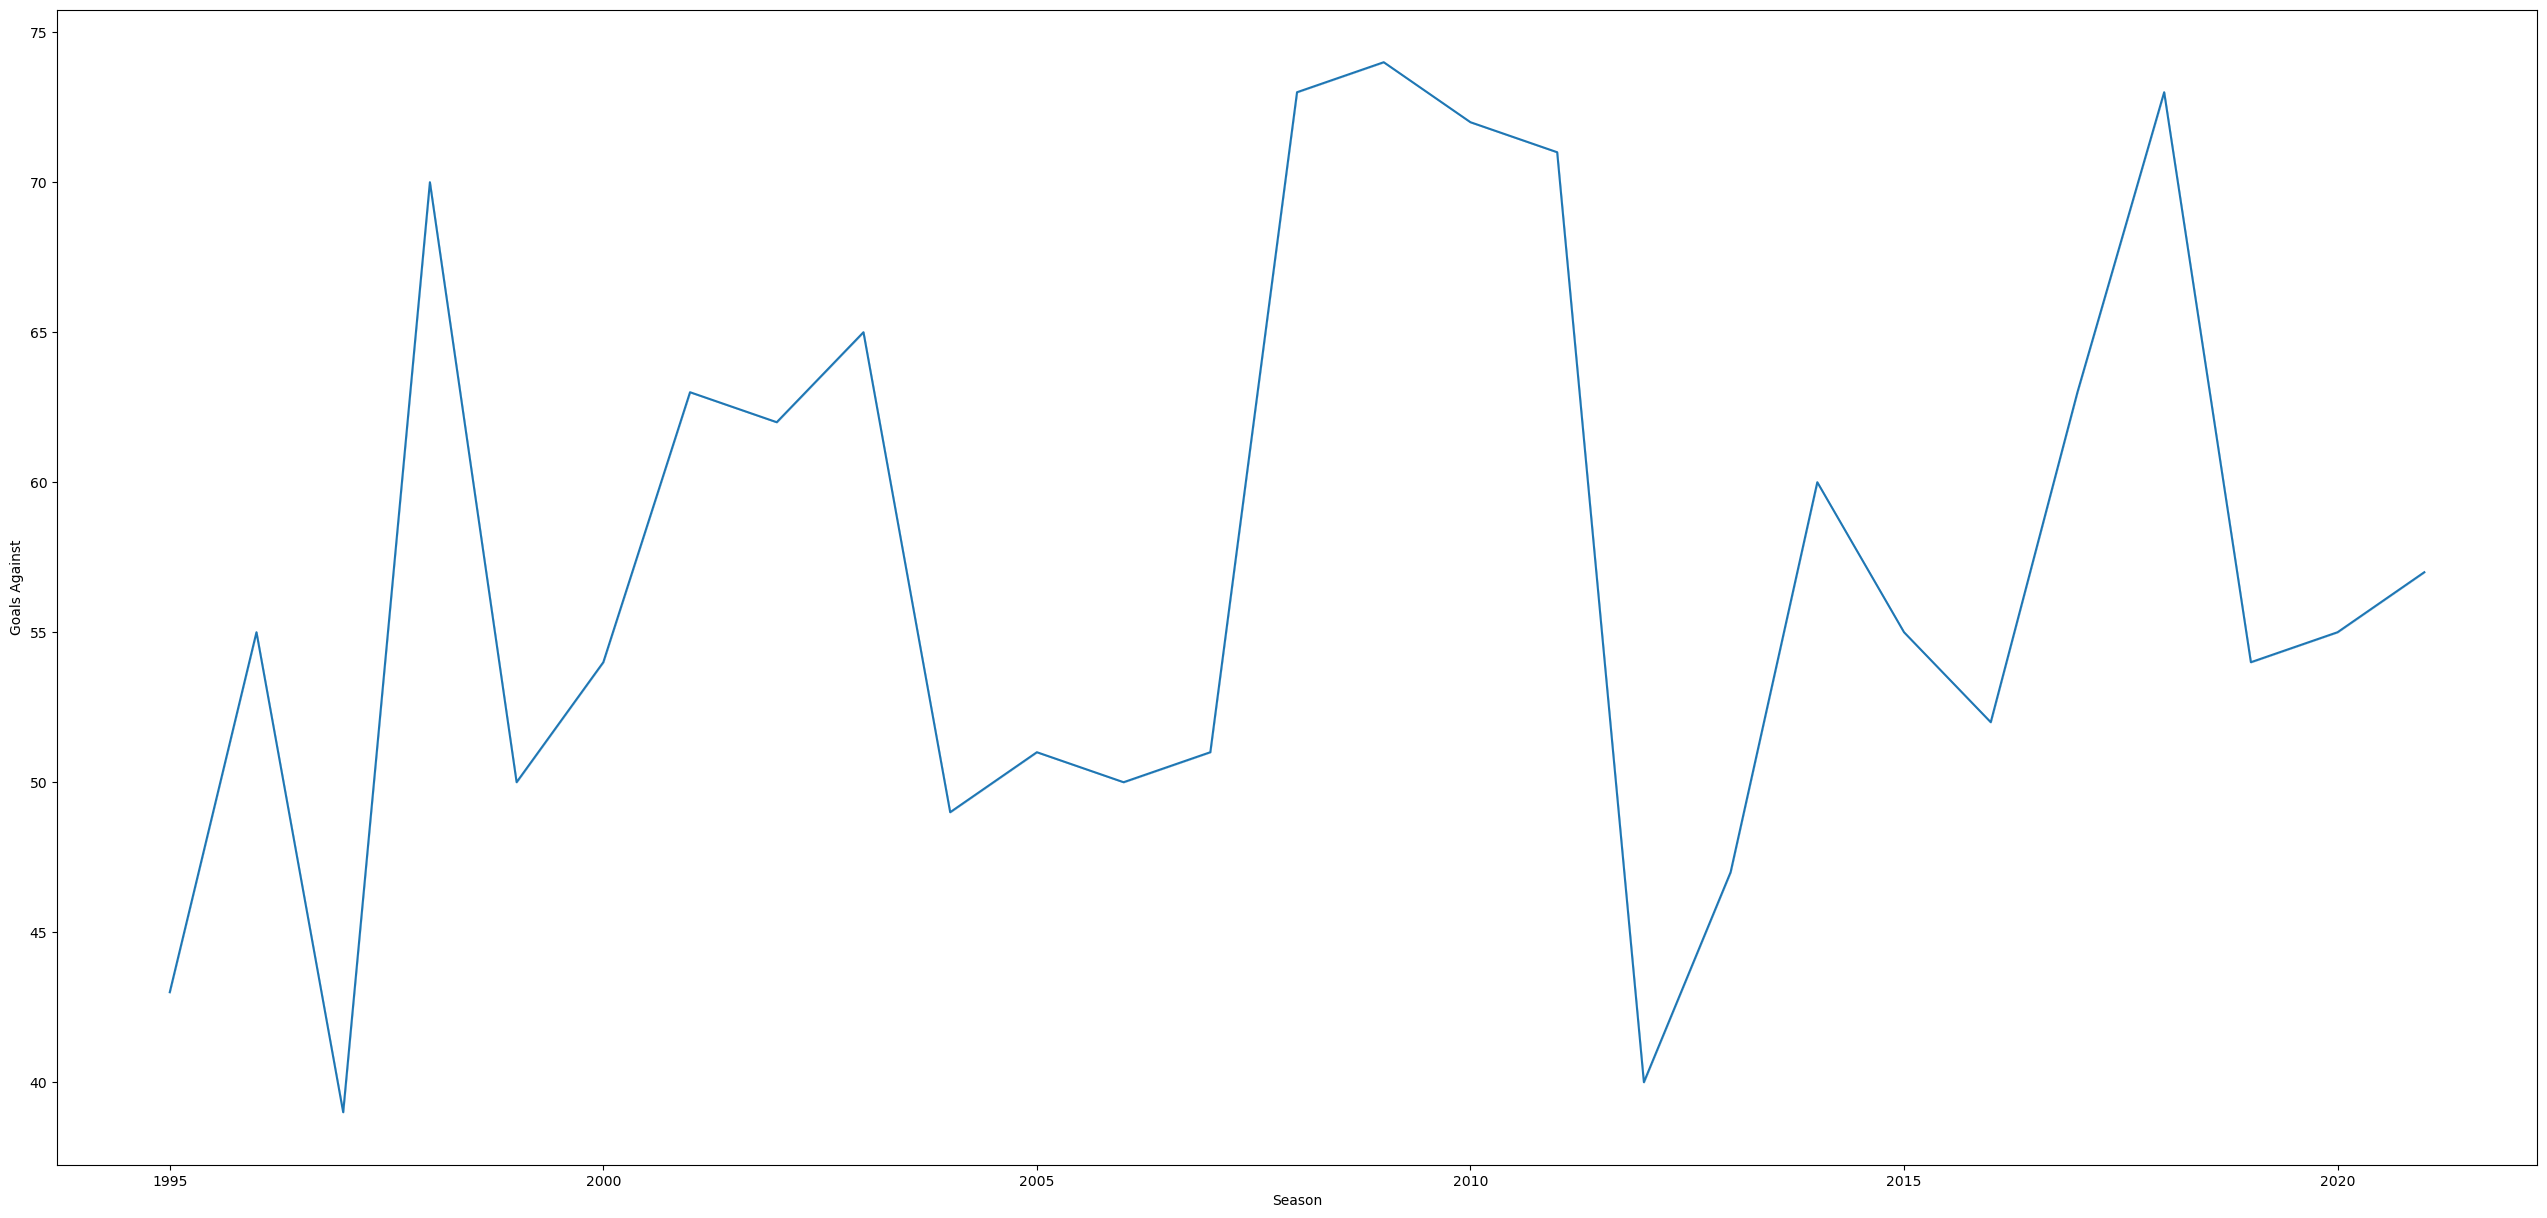

In [84]:
plt.figure(figsize=(32,15))
sns.lineplot(x='season_start_year', y='goals_against_(total)', data=master_df)
plt.xlabel('Season')
plt.ylabel('Goals Against')
plt.show()

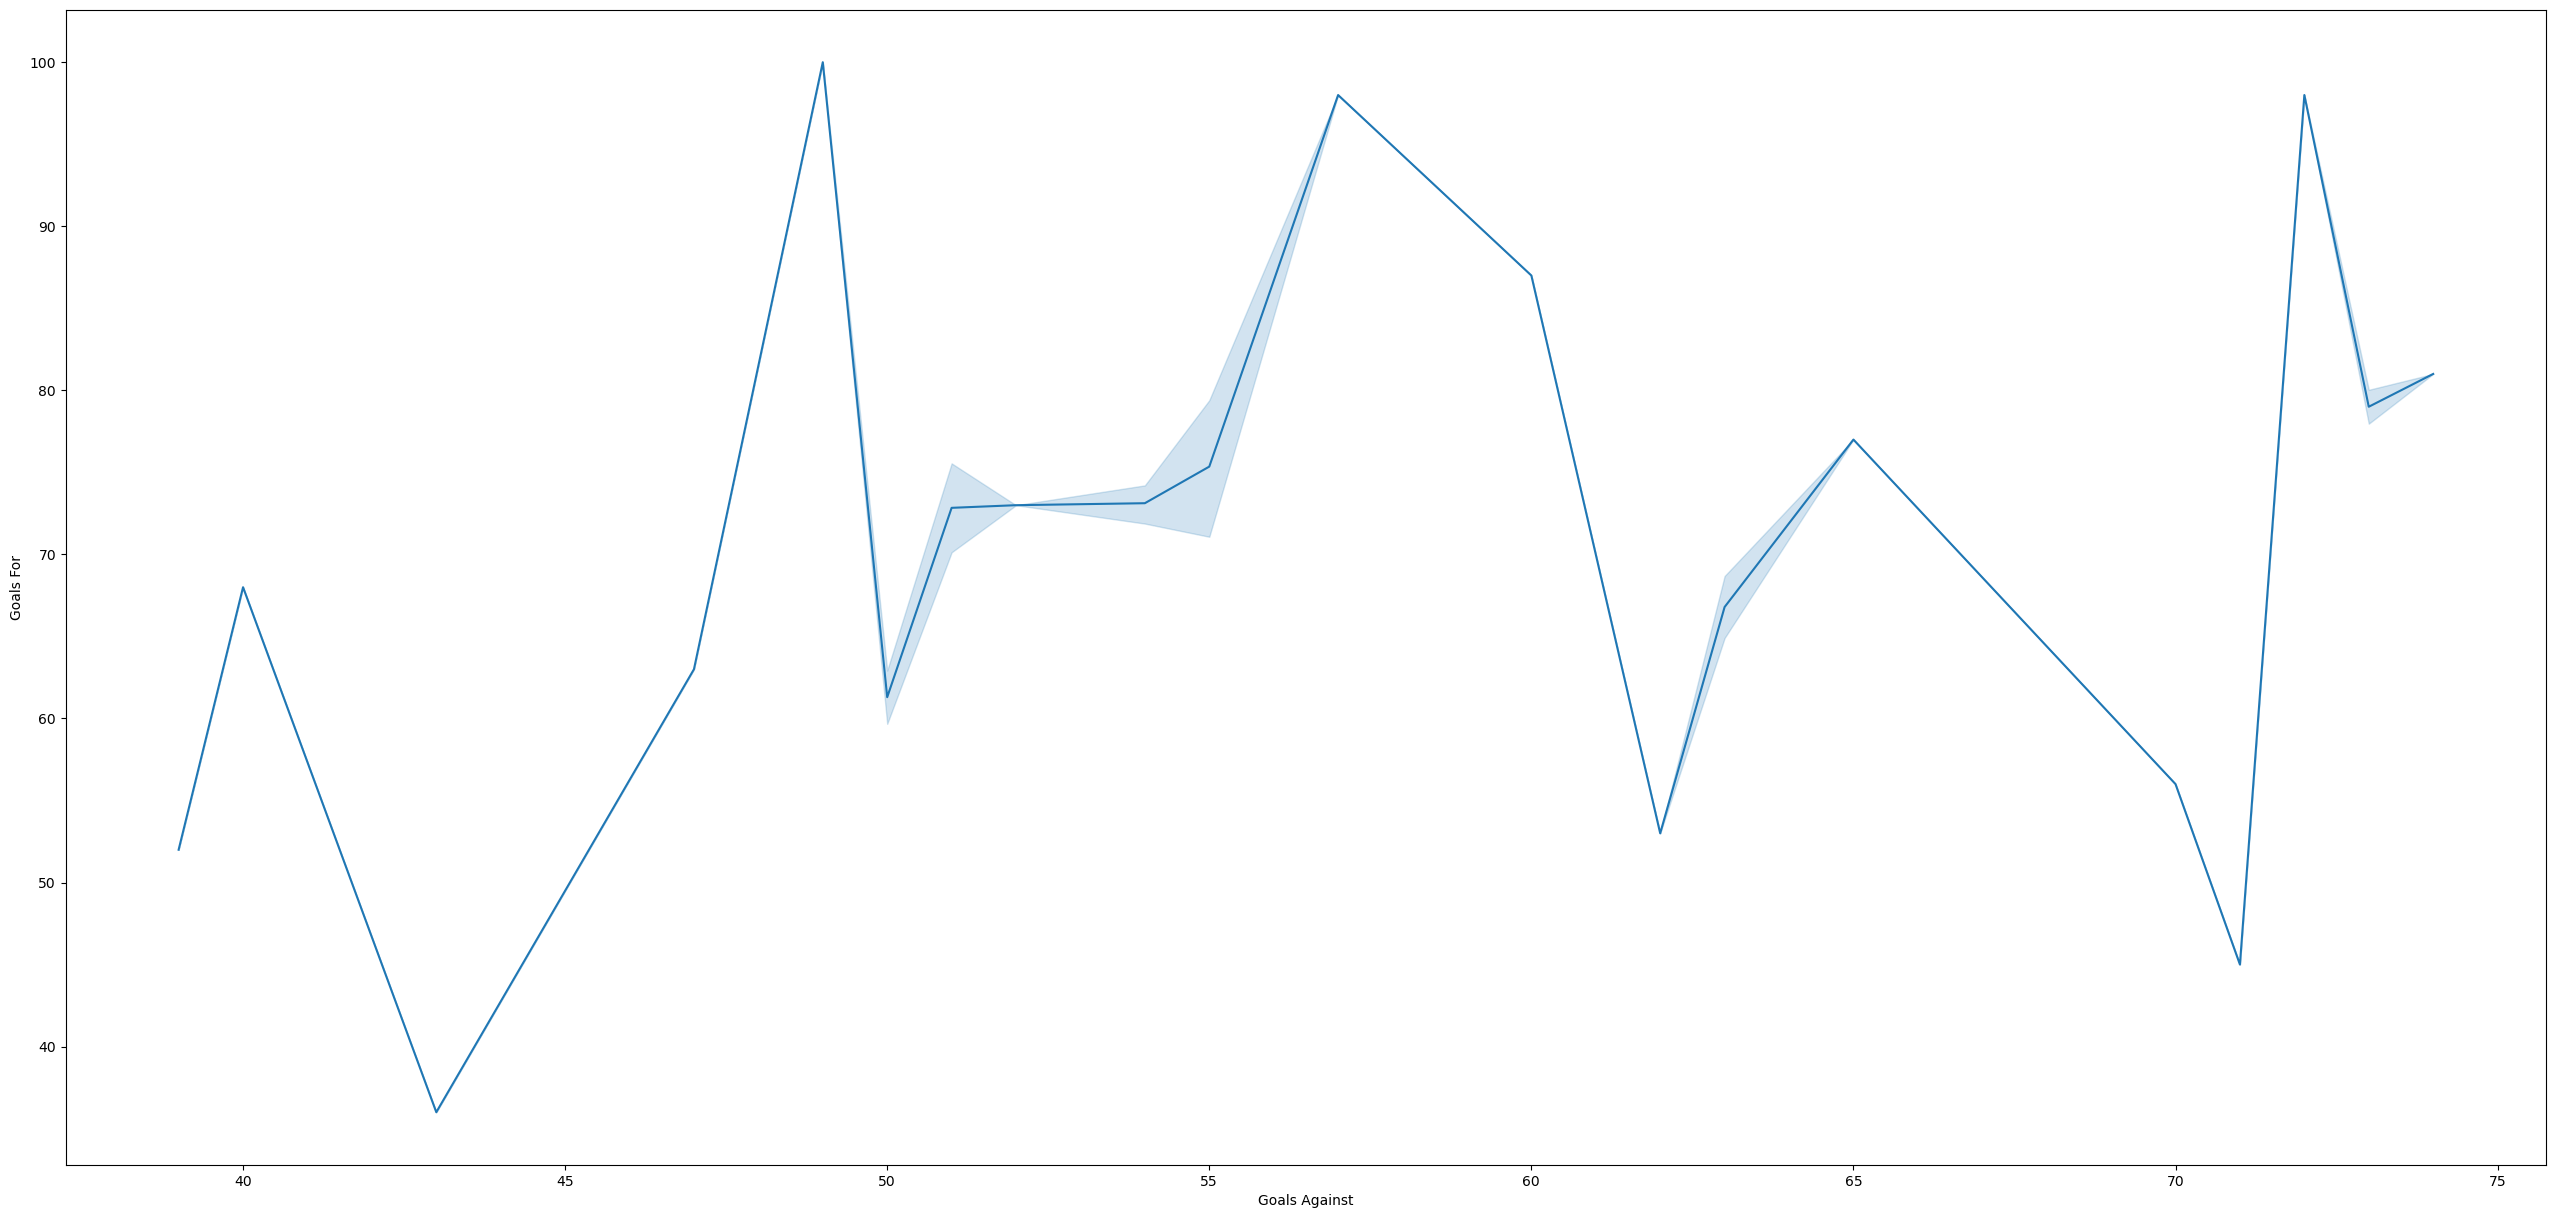

In [85]:
plt.figure(figsize=(32,15))
sns.lineplot(x='goals_against_(total)', y='goals_for_(total)', data=master_df)
plt.xlabel('Goals Against')
plt.ylabel('Goals For')
plt.show()

### Correlation Matrix

In [88]:
master_df.isna().sum()

season                             0
season_start_year                  0
league                             0
division                           0
league_finish                      0
position                           0
name                               0
nationality                        0
age                                0
minutes_(total)                    0
starting_appearances_(league)      0
substitute_appearances_(league)    0
starting_appearances_(total)       0
substitute_appearances_(total)     0
total_appearances                  0
goals_(total)                      0
goals_(league)                     0
g/minutes_(total)                  0
g/appearances_(total)              0
european_competition               0
tier                               0
performance                        0
round_of_tournament                0
homegrown_players                  0
transfers_in                       0
transfers_out                      0
net_transfers                      0
g

In [89]:
master_df.dtypes

season                              object
season_start_year                    int64
league                              object
division                             int64
league_finish                        int64
position                            object
name                                object
nationality                         object
age                                  int64
minutes_(total)                      int64
starting_appearances_(league)        int64
substitute_appearances_(league)      int64
starting_appearances_(total)         int64
substitute_appearances_(total)       int64
total_appearances                    int64
goals_(total)                        int64
goals_(league)                       int64
g/minutes_(total)                  float64
g/appearances_(total)              float64
european_competition                object
tier                                object
performance                         object
round_of_tournament                 object
homegrown_p

In [90]:
data = pd.DataFrame(master_df.copy())

In [91]:
display(data)

season  season_start_year            league  division  league_finish  \
0    1995-1996               1995  Segunda División         2             15   
1    1995-1996               1995  Segunda División         2             15   
2    1995-1996               1995  Segunda División         2             15   
3    1995-1996               1995  Segunda División         2             15   
4    1995-1996               1995  Segunda División         2             15   
..         ...                ...               ...       ...            ...   
929  2021-2022               2021           La Liga         1              7   
930  2021-2022               2021           La Liga         1              7   
931  2021-2022               2021           La Liga         1              7   
932  2021-2022               2021           La Liga         1              7   
933  2021-2022               2021           La Liga         1              7   

    position                     name nationality  age  minutes_(total)  \
0         GK             Luis Pascual       Spain   27             2880   
1         GK       Alejandro Revuelta       Spain   24                0   
2         GK    Juan Díez de los Ríos       Spain   19                0   
3         GK  Francisco Sánchez Broto       Spain   24              720   
4         DF            Pascual Donat       Spain   27             2563   
..       ...                      ...         ...  ...              ...   
929       FW                Dani Raba       Spain   26              328   
930       FW              Yéremi Pino       Spain   19             2225   
931       FW              Boulaye Dia     Senegal   25             1653   
932       FW           Samu Chukwueze     Nigeria   22             1766   
933       FW            Gerard Moreno       Spain   29             1907   

     starting_appearances_(league)  substitute_appearances_(league)  \
0                               31                                0   
1                                0                                0   
2                                0                                0   
3                                7                                0   
4                               30                                1   
..                             ...                              ...   
929                              0                                7   
930                             21                               10   
931                             13                               12   
932                             12                               15   
933                             14                                3   

     starting_appearances_(total)  substitute_appearances_(total)  \
0                              32                               0   
1                               0                               0   
2                               0                               0   
3                               8                               0   
4                              31                               2   
..                            ...                             ...   
929                             3                               9   
930                            28                              12   
931                            17                              18   
932                            16                              22   
933                            21                               6   

     total_appearances  goals_(total)  goals_(league)  g/minutes_(total)  \
0                   32              0               0           0.000000   
1                    0              0               0           0.000000   
2                    0              0               0           0.000000   
3                    8              0               0           0.000000   
4                   33              1               1        2563.000000   
..      

In [92]:
data['nationality'].nunique()

37

In [93]:
data['tier']

0      DNQ
1      DNQ
2      DNQ
3      DNQ
4      DNQ
      ... 
929      1
930      1
931      1
932      1
933      1
Name: tier, Length: 934, dtype: object

In [94]:
data['tier'] = pd.to_numeric(data['tier'], errors='coerce')

In [95]:
data['tier'].dtype

dtype('float64')

In [96]:
numericals = data.select_dtypes(include=[np.number])
categoricals = data.select_dtypes(exclude=[np.number])

In [97]:
display(numericals)

season_start_year  division  league_finish  age  minutes_(total)  \
0                 1995         2             15   27             2880   
1                 1995         2             15   24                0   
2                 1995         2             15   19                0   
3                 1995         2             15   24              720   
4                 1995         2             15   27             2563   
..                 ...       ...            ...  ...              ...   
929               2021         1              7   26              328   
930               2021         1              7   19             2225   
931               2021         1              7   25             1653   
932               2021         1              7   22             1766   
933               2021         1              7   29             1907   

     starting_appearances_(league)  substitute_appearances_(league)  \
0                               31                                0   
1                                0                                0   
2                                0                                0   
3                                7                                0   
4                               30                                1   
..                             ...                              ...   
929                              0                                7   
930                             21                               10   
931                             13                               12   
932                             12                               15   
933                             14                                3   

     starting_appearances_(total)  substitute_appearances_(total)  \
0                              32                               0   
1                               0                               0   
2                               0                               0   
3                               8                               0   
4                              31                               2   
..                            ...                             ...   
929                             3                               9   
930                            28                              12   
931                            17                              18   
932                            16                              22   
933                            21                               6   

     total_appearances  goals_(total)  goals_(league)  g/minutes_(total)  \
0                   32              0               0           0.000000   
1                    0              0               0           0.000000   
2                    0              0               0           0.000000   
3                    8              0               0           0.000000   
4                   33              1               1        2563.000000   
..                 ...            ...             ...                ...   
929                 12              1               0         328.000000   
930                 40              7               6         317.857143   
931                 35              7               5         236.142857   
932                 38              7               3         252.285714   
933                 27             13               9         146.692308   

     g/appearances_(total)  tier  homegrown_players  transfers_in  \
0                 0.000000   NaN                  2             6   
1                 0.000000   NaN                  2             6   
2                 0.000000   NaN                  2             6   
3                 0.000000   NaN                  2             6   
4                33.000000   NaN                  2             6   
..                     ...   ...                ...           ...   
929              12.000000   1.0                 2

In [98]:
numericals.fillna("")

season_start_year  division  league_finish  age  minutes_(total)  \
0                 1995         2             15   27             2880   
1                 1995         2             15   24                0   
2                 1995         2             15   19                0   
3                 1995         2             15   24              720   
4                 1995         2             15   27             2563   
..                 ...       ...            ...  ...              ...   
929               2021         1              7   26              328   
930               2021         1              7   19             2225   
931               2021         1              7   25             1653   
932               2021         1              7   22             1766   
933               2021         1              7   29             1907   

     starting_appearances_(league)  substitute_appearances_(league)  \
0                               31                                0   
1                                0                                0   
2                                0                                0   
3                                7                                0   
4                               30                                1   
..                             ...                              ...   
929                              0                                7   
930                             21                               10   
931                             13                               12   
932                             12                               15   
933                             14                                3   

     starting_appearances_(total)  substitute_appearances_(total)  \
0                              32                               0   
1                               0                               0   
2                               0                               0   
3                               8                               0   
4                              31                               2   
..                            ...                             ...   
929                             3                               9   
930                            28                              12   
931                            17                              18   
932                            16                              22   
933                            21                               6   

     total_appearances  goals_(total)  goals_(league)  g/minutes_(total)  \
0                   32              0               0           0.000000   
1                    0              0               0           0.000000   
2                    0              0               0           0.000000   
3                    8              0               0           0.000000   
4                   33              1               1        2563.000000   
..                 ...            ...             ...                ...   
929                 12              1               0         328.000000   
930                 40              7               6         317.857143   
931                 35              7               5         236.142857   
932                 38              7               3         252.285714   
933                 27             13               9         146.692308   

     g/appearances_(total) tier  homegrown_players  transfers_in  \
0                 0.000000                       2             6   
1                 0.000000                       2             6   
2                 0.000000                       2             6   
3                 0.000000                       2             6   
4                33.000000                       2             6   
..                     ...  ...                ...           ...   
929              12.000000  1.0                 22       

In [99]:
numericals.columns

Index(['season_start_year', 'division', 'league_finish', 'age',
       'minutes_(total)', 'starting_appearances_(league)',
       'substitute_appearances_(league)', 'starting_appearances_(total)',
       'substitute_appearances_(total)', 'total_appearances', 'goals_(total)',
       'goals_(league)', 'g/minutes_(total)', 'g/appearances_(total)', 'tier',
       'homegrown_players', 'transfers_in', 'transfers_out', 'net_transfers',
       'games_played_(total)', 'goals_for_(total)', 'goals_against_(total)',
       'goal_difference_(total)', 'goals_per_game_(total)',
       'games_played_(league)', 'goals_for_(league)', 'goals_against_(league)',
       'goal_difference_(league)', 'goals_per_game_(league)', 'average_age',
       'average_appearances', 'average_minutes'],
      dtype='object')

/var/folders/zh/vb5lf3750v95681z25hzkm9c0000gn/T/ipykernel_65116/2556753048.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



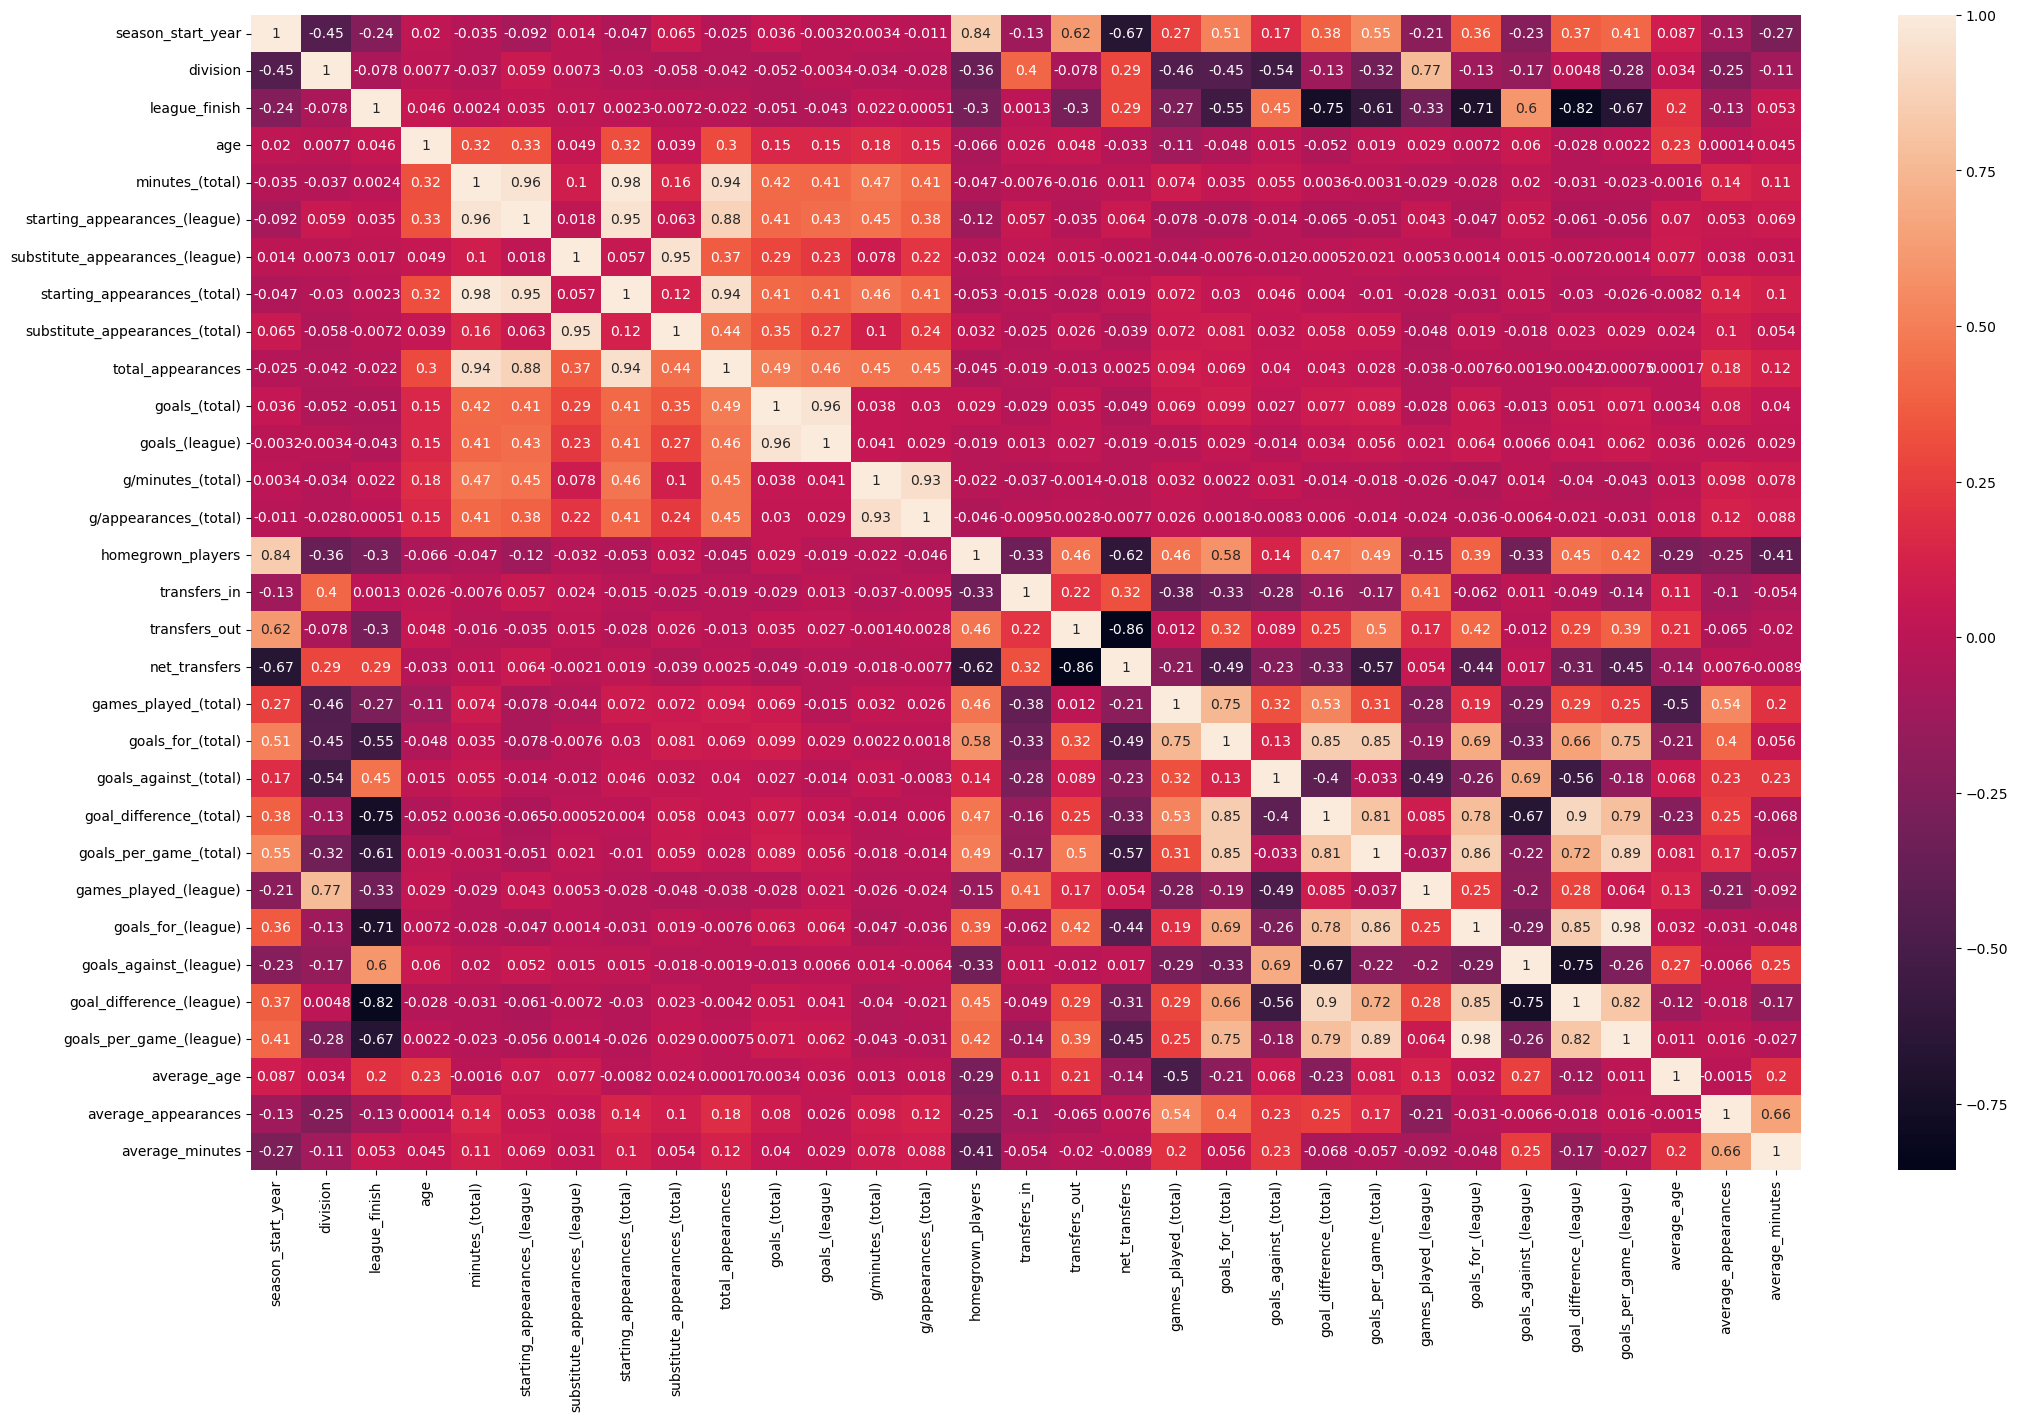

In [100]:
plt.figure(figsize=(25,15))
corr = master_df.corr()
sns.heatmap(corr, annot=True)
plt.show()

### Storing Cleaned Data

In [102]:
master_df.to_csv("../Data/Clean/data_cleaned.csv", index=False)